In [2]:
# Crosss match weather and hostorical dataset make comparison for 2022 year and report findings
# Task1: Need to create the dataframe conssiting of data, time, one feature (both Firestation temperature & weather temperature)
    #Step1: Need to download each state data and fix the details as per the closest asos satellite - again might need to cluster
    #step2: Alternative is to directly calculate the distances across from each point to all satellites locations & select min.
#Task2: After creating the dataset needs to perform some sort of hypothesis testing to compare if the values are similar or they
# only vary slightly. If different within some range - create hypothesis
#Task3: If hypothesis fails then we need some way to predict firestations deatils using weather data - maybe interpolate or 
# predict values.

In [3]:
!pip install vaex

In [4]:
!pip install haversine

In [5]:
import numpy as np
from math import radians, cos, sin, asin, sqrt

In [6]:
import pandas as pd

In [7]:
import vaex

In [8]:
fire_weather = pd.read_csv("Public_View_-_Interagency_Remote_Automatic_Weather_Stations_(RAWS).csv")

In [9]:
len(fire_weather)

4403

In [10]:
fire_weather.head(5)

,X,Y,OBJECTID,StationName,WXID,ObservedDate,NESSID,NWSID,Elevation,SiteDescription,...,WindDirDegrees,AirTempStandPlace,FuelTemp,RelativeHumidity,BatteryVoltage,FuelMoisture,WindDirPeak,WindSpeedPeak,SolarRadiation,StationID
0,-90.08306,44.02861,1,NECEDAH,17372963.0,2022/09/17 13:47:59+00,8376139A,474301,950.0,NaN,...,176 degrees,69 deg. F,73 deg. F,79 %,13.2 volts,20.5 (unk),183 degrees,11 mph,142 w/m2,17372963
1,-84.65417,36.47500,2,BISO-NP,17246242.0,2022/03/15 12:54:00+00,FA6321D4,400902,1445.0,NaN,...,197 degrees,41 deg. F,41 deg. F,75 %,12.9 volts,12.6 (unk),300 degrees,2 mph,37 w/m2,17246242
2,-105.02978,46.30739,3,KNOWLTON,16831540.0,2022/05/02 22:40:00+00,325AE3F8,244102,3320.0,SITE IS LOCATED ON A SMALL KNOLL APPROX. 30 YD...,...,180 degrees,55 deg. F,NO DATA,44 %,13.7 volts,NO DATA,198 degrees,22 mph,442 w/m2,16831540
3,-122.57000,38.03944,4,BIG ROCK,17414417.0,2022/08/03 15:33:59+00,CA28F196,42310,1500.0,NaN,...,144 degrees,62 deg. F,65 deg. F,78 %,13.1 volts,11.3 (unk),115 degrees,6 mph,138 w/m2,17414417
4,-106.29250,37.33111,5,SAN LUIS VALLEY PORTABLE,17567535.0,2022/05/06 01:39:00+00,32941370,NaN,9170.0,SLV Portable is located on the Conejos Peak Di...,...,230 degrees,51 deg. F,48 deg. F,22 %,13 volts,4.7 (unk),318 degrees,14 mph,40 w/m2,17567535


In [11]:
a=fire_weather[fire_weather["State"] =="TX"]
fire_temp=a[["X","Y","ObservedDate","State","AirTempStandPlace"]]
fire_temp

,X,Y,ObservedDate,State,AirTempStandPlace
38,-94.65811,31.75942,2021/12/09 18:29:00+00,TX,74 deg. F
94,-99.18639,30.73583,2022/03/15 13:28:59+00,TX,48 deg. F
105,-101.56833,35.69028,2022/09/17 13:36:00+00,TX,74 deg. F
145,-94.11639,32.65833,2022/03/15 13:11:00+00,TX,53 deg. F
163,-101.15778,30.98556,2022/03/24 06:08:00+00,TX,41 deg. F
...,...,...,...,...,...
4288,-97.63206,33.28267,2022/09/17 14:03:00+00,TX,78 deg. F
4291,-96.99306,32.60917,2022/09/17 14:08:00+00,TX,79 deg. F
4293,-95.09472,30.51806,2022/09/17 14:03:00+00,TX,78 deg. F
4299,-97.81694,32.44694,2022/09/17 14:03:59+00,TX,79 deg. F


In [12]:
fire_temp['Dates'] = pd.to_datetime(fire_temp["ObservedDate"]).dt.date
fire_temp['Time'] = pd.to_datetime(fire_temp["ObservedDate"]).dt.time
fire_temp['Year'] = pd.to_datetime(fire_temp["ObservedDate"]).dt.year

<ipython-input-12-e5123ec44bcb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_temp['Dates'] = pd.to_datetime(fire_temp["ObservedDate"]).dt.date
<ipython-input-12-e5123ec44bcb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_temp['Time'] = pd.to_datetime(fire_temp["ObservedDate"]).dt.time
<ipython-input-12-e5123ec44bcb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [13]:
fire_temp

,X,Y,ObservedDate,State,AirTempStandPlace,Dates,Time,Year
38,-94.65811,31.75942,2021/12/09 18:29:00+00,TX,74 deg. F,2021-12-09,18:29:00,2021
94,-99.18639,30.73583,2022/03/15 13:28:59+00,TX,48 deg. F,2022-03-15,13:28:59,2022
105,-101.56833,35.69028,2022/09/17 13:36:00+00,TX,74 deg. F,2022-09-17,13:36:00,2022
145,-94.11639,32.65833,2022/03/15 13:11:00+00,TX,53 deg. F,2022-03-15,13:11:00,2022
163,-101.15778,30.98556,2022/03/24 06:08:00+00,TX,41 deg. F,2022-03-24,06:08:00,2022
...,...,...,...,...,...,...,...,...
4288,-97.63206,33.28267,2022/09/17 14:03:00+00,TX,78 deg. F,2022-09-17,14:03:00,2022
4291,-96.99306,32.60917,2022/09/17 14:08:00+00,TX,79 deg. F,2022-09-17,14:08:00,2022
4293,-95.09472,30.51806,2022/09/17 14:03:00+00,TX,78 deg. F,2022-09-17,14:03:00,2022
4299,-97.81694,32.44694,2022/09/17 14:03:59+00,TX,79 deg. F,2022-09-17,14:03:59,2022


In [14]:
weather_data = pd.read_csv("weather_asos_TX_2022.csv")
weather_data

C:\Users\ishan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (21,22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,station,valid,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,...,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar,snowdepth
0,GUL,2022-01-01 00:00,77.0,73.4,88.67,210.0,11.0,0.00,29.83,NaN,...,BR,NaN,NaN,NaN,NaN,NaN,NaN,77.00,KGUL 010000Z AUTO 21011KT 5SM BR FEW015 25/23 ...,NaN
1,GZN,2022-01-01 00:00,66.2,51.8,59.74,0.0,0.0,0.00,29.66,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.20,KGZN 010000Z AUTO 00000KT 10SM CLR 19/11 A2966...,NaN
2,VAF,2022-01-01 00:00,77.0,71.6,83.44,NaN,NaN,0.00,29.81,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.00,KVAF 010000Z AUTO 10SM OVC018 25/22 A2981 RMK A01,NaN
3,NGP,2022-01-01 00:03,78.1,73.0,84.36,160.0,23.0,0.00,29.69,NaN,...,HZ,NaN,NaN,NaN,31.0,170.0,2022-01-01 00:00,78.10,KNGP 010003Z AUTO 16023G31KT 6SM HZ OVC011 26/...,NaN
4,GLS,2022-01-01 00:07,75.0,70.0,84.46,160.0,12.0,0.00,29.77,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.00,KGLS 010007Z AUTO 16012KT 10SM OVC030 24/21 A2...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2838524,BIF,2022-09-22 23:56,89.8,46.9,22.81,70.0,9.0,0.00,30.03,1010.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.47,KBIF 222356Z AUTO 07009KT 10SM CLR 32/08 A3003...,NaN
2838525,NOG,2022-09-22 23:56,88.0,64.0,44.95,120.0,10.0,0.00,29.93,1011.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.34,KNOG 222356Z AUTO 12010KT 10SM CLR 31/18 A2993...,NaN
2838526,NGP,2022-09-22 23:56,87.1,73.0,63.02,120.0,7.0,0.00,29.92,1013.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.55,KNGP 222356Z 12007KT 10SM FEW025 SCT300 31/23 ...,NaN
2838527,PRX,2022-09-22 23:56,91.9,55.9,29.80,150.0,5.0,0.00,29.93,1013.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.17,KPRX 222356Z AUTO 15005KT 10SM CLR 33/13 A2993...,NaN


In [15]:
len(weather_data)

2838529

In [16]:
weather_data['Dates'] = pd.to_datetime(weather_data["valid"]).dt.date
weather_data['Time'] = pd.to_datetime(weather_data["valid"]).dt.time

In [17]:
weather_data

,station,valid,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,...,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar,snowdepth,Dates,Time
0,GUL,2022-01-01 00:00,77.0,73.4,88.67,210.0,11.0,0.00,29.83,NaN,...,NaN,NaN,NaN,NaN,NaN,77.00,KGUL 010000Z AUTO 21011KT 5SM BR FEW015 25/23 ...,NaN,2022-01-01,00:00:00
1,GZN,2022-01-01 00:00,66.2,51.8,59.74,0.0,0.0,0.00,29.66,NaN,...,NaN,NaN,NaN,NaN,NaN,66.20,KGZN 010000Z AUTO 00000KT 10SM CLR 19/11 A2966...,NaN,2022-01-01,00:00:00
2,VAF,2022-01-01 00:00,77.0,71.6,83.44,NaN,NaN,0.00,29.81,NaN,...,NaN,NaN,NaN,NaN,NaN,77.00,KVAF 010000Z AUTO 10SM OVC018 25/22 A2981 RMK A01,NaN,2022-01-01,00:00:00
3,NGP,2022-01-01 00:03,78.1,73.0,84.36,160.0,23.0,0.00,29.69,NaN,...,NaN,NaN,31.0,170.0,2022-01-01 00:00,78.10,KNGP 010003Z AUTO 16023G31KT 6SM HZ OVC011 26/...,NaN,2022-01-01,00:03:00
4,GLS,2022-01-01 00:07,75.0,70.0,84.46,160.0,12.0,0.00,29.77,NaN,...,NaN,NaN,NaN,NaN,NaN,75.00,KGLS 010007Z AUTO 16012KT 10SM OVC030 24/21 A2...,NaN,2022-01-01,00:07:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2838524,BIF,2022-09-22 23:56,89.8,46.9,22.81,70.0,9.0,0.00,30.03,1010.3,...,NaN,NaN,NaN,NaN,NaN,86.47,KBIF 222356Z AUTO 07009KT 10SM CLR 32/08 A3003...,NaN,2022-09-22,23:56:00
2838525,NOG,2022-09-22 23:56,88.0,64.0,44.95,120.0,10.0,0.00,29.93,1011.5,...,NaN,NaN,NaN,NaN,NaN,89.34,KNOG 222356Z AUTO 12010KT 10SM CLR 31/18 A2993...,NaN,2022-09-22,23:56:00
2838526,NGP,2022-09-22 23:56,87.1,73.0,63.02,120.0,7.0,0.00,29.92,1013.1,...,NaN,NaN,NaN,NaN,NaN,94.55,KNGP 222356Z 12007KT 10SM FEW025 SCT300 31/23 ...,NaN,2022-09-22,23:56:00
2838527,PRX,2022-09-22 23:56,91.9,55.9,29.80,150.0,5.0,0.00,29.93,1013.2,...,NaN,NaN,NaN,NaN,NaN,90.17,KPRX 222356Z AUTO 15005KT 10SM CLR 33/13 A2993...,NaN,2022-09-22,23:56:00


In [18]:
TX_weather_stations = pd.read_csv("TX_ASOS_Stations.csv")
TX_weather_stations

,station,station_name,lat,lon,elev,begints,iem_network
0,ABI,Abilene,32.41063,-99.68209,544.9975,8/1/1946 0:00,TX_ASOS
1,GYF,Alaminos Canyon Block 857,26.12900,-94.89800,65.0000,12/27/2019 0:00,TX_ASOS
2,ALI,ALICE INTL AIRPORT,27.74089,-98.02694,54.0000,8/1/1946 0:00,TX_ASOS
3,E38,ALPINE,30.38400,-103.68400,1376.0000,6/6/2003 0:00,TX_ASOS
4,AMA,AMARILLO ARPT(AWOS),35.21936,-101.70592,1099.0000,3/1/1943 0:00,TX_ASOS
...,...,...,...,...,...,...,...
227,ARM,WHARTON REGIONAL ARPT,29.25428,-96.15439,30.0000,1/1/2005 0:00,TX_ASOS
228,SPS,WICHITA FALLS/SHEP,33.97860,-98.49280,314.0000,4/13/1942 0:00,TX_ASOS
229,INK,WINK/WINKLER CO.,31.78000,-103.20000,859.0000,8/1/1946 0:00,TX_ASOS
230,APY,Zapata,26.96879,-99.24891,128.6000,11/26/2008 0:00,TX_ASOS


In [19]:
# all uniques stations around 232
boolean =TX_weather_stations['station'].duplicated().any()

In [20]:
#Need to join the 2 dataframes - weather_data and TX_weather_stations based on column station(common value)
#merged_inner = pd.merge(left=survey_sub, right=species_sub, left_on='species_id', right_on='species_id')

merged_df = pd.merge(left=weather_data, right=TX_weather_stations, left_on='station', right_on='station')
merged_df

,station,valid,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,...,metar,snowdepth,Dates,Time,station_name,lat,lon,elev,begints,iem_network
0,GUL,2022-01-01 00:00,77.0,73.4,88.67,210.0,11.0,0.00,29.83,NaN,...,KGUL 010000Z AUTO 21011KT 5SM BR FEW015 25/23 ...,NaN,2022-01-01,00:00:00,Gunnison (GoM),27.3039,-93.5383,0.0,1/13/2010 0:00,TX_ASOS
1,GUL,2022-01-01 00:20,77.0,73.4,88.67,210.0,10.0,0.00,29.83,NaN,...,KGUL 010020Z AUTO 21010KT 5SM BR FEW015 25/23 ...,NaN,2022-01-01,00:20:00,Gunnison (GoM),27.3039,-93.5383,0.0,1/13/2010 0:00,TX_ASOS
2,GUL,2022-01-01 00:40,77.0,73.4,88.67,210.0,10.0,0.00,29.83,NaN,...,KGUL 010040Z AUTO 21010KT 5SM BR SCT018 25/23 ...,NaN,2022-01-01,00:40:00,Gunnison (GoM),27.3039,-93.5383,0.0,1/13/2010 0:00,TX_ASOS
3,GUL,2022-01-01 01:00,77.0,73.4,88.67,210.0,9.0,0.00,29.84,NaN,...,KGUL 010100Z AUTO 21009KT 4SM BR FEW015 FEW020...,NaN,2022-01-01,01:00:00,Gunnison (GoM),27.3039,-93.5383,0.0,1/13/2010 0:00,TX_ASOS
4,GUL,2022-01-01 01:20,77.0,73.4,88.67,210.0,10.0,0.00,29.83,NaN,...,KGUL 010120Z AUTO 21010KT 5SM BR SCT015 25/23 ...,NaN,2022-01-01,01:20:00,Gunnison (GoM),27.3039,-93.5383,0.0,1/13/2010 0:00,TX_ASOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2838524,ATA,2022-09-22 22:35,93.7,66.0,40.31,0.0,0.0,0.00,29.92,1003.2,...,KATA 222235Z AUTO 00000KT 10SM CLR 34/19 A2992...,NaN,2022-09-22,22:35:00,Atlanta,33.1018,-94.1953,81.0,5/19/2022 0:00,TX_ASOS
2838525,ATA,2022-09-22 22:55,92.5,68.4,45.46,250.0,3.0,0.00,29.92,1003.2,...,KATA 222255Z AUTO 25003KT 10SM CLR 34/20 A2992...,NaN,2022-09-22,22:55:00,Atlanta,33.1018,-94.1953,81.0,5/19/2022 0:00,TX_ASOS
2838526,ATA,2022-09-22 23:15,89.8,75.2,62.29,0.0,0.0,0.00,29.92,1003.0,...,KATA 222315Z AUTO 00000KT 10SM CLR 32/24 A2992...,NaN,2022-09-22,23:15:00,Atlanta,33.1018,-94.1953,81.0,5/19/2022 0:00,TX_ASOS
2838527,ATA,2022-09-22 23:35,86.0,75.7,71.45,0.0,0.0,0.00,29.92,1003.0,...,KATA 222335Z AUTO 00000KT 10SM CLR 30/24 A2992...,NaN,2022-09-22,23:35:00,Atlanta,33.1018,-94.1953,81.0,5/19/2022 0:00,TX_ASOS


In [21]:
weather_merged_temp = merged_df[["station","tmpf","lat","lon","Dates","Time"]]
weather_merged_temp

,station,tmpf,lat,lon,Dates,Time
0,GUL,77.0,27.3039,-93.5383,2022-01-01,00:00:00
1,GUL,77.0,27.3039,-93.5383,2022-01-01,00:20:00
2,GUL,77.0,27.3039,-93.5383,2022-01-01,00:40:00
3,GUL,77.0,27.3039,-93.5383,2022-01-01,01:00:00
4,GUL,77.0,27.3039,-93.5383,2022-01-01,01:20:00
...,...,...,...,...,...,...
2838524,ATA,93.7,33.1018,-94.1953,2022-09-22,22:35:00
2838525,ATA,92.5,33.1018,-94.1953,2022-09-22,22:55:00
2838526,ATA,89.8,33.1018,-94.1953,2022-09-22,23:15:00
2838527,ATA,86.0,33.1018,-94.1953,2022-09-22,23:35:00


In [22]:
fire_temp

,X,Y,ObservedDate,State,AirTempStandPlace,Dates,Time,Year
38,-94.65811,31.75942,2021/12/09 18:29:00+00,TX,74 deg. F,2021-12-09,18:29:00,2021
94,-99.18639,30.73583,2022/03/15 13:28:59+00,TX,48 deg. F,2022-03-15,13:28:59,2022
105,-101.56833,35.69028,2022/09/17 13:36:00+00,TX,74 deg. F,2022-09-17,13:36:00,2022
145,-94.11639,32.65833,2022/03/15 13:11:00+00,TX,53 deg. F,2022-03-15,13:11:00,2022
163,-101.15778,30.98556,2022/03/24 06:08:00+00,TX,41 deg. F,2022-03-24,06:08:00,2022
...,...,...,...,...,...,...,...,...
4288,-97.63206,33.28267,2022/09/17 14:03:00+00,TX,78 deg. F,2022-09-17,14:03:00,2022
4291,-96.99306,32.60917,2022/09/17 14:08:00+00,TX,79 deg. F,2022-09-17,14:08:00,2022
4293,-95.09472,30.51806,2022/09/17 14:03:00+00,TX,78 deg. F,2022-09-17,14:03:00,2022
4299,-97.81694,32.44694,2022/09/17 14:03:59+00,TX,79 deg. F,2022-09-17,14:03:59,2022


In [23]:
#### Removing 2021 entry as currently matching only 2022 data

In [24]:
i = fire_temp[fire_temp["Year"]==2021].index
fire_temp=fire_temp.drop(i)
fire_temp

,X,Y,ObservedDate,State,AirTempStandPlace,Dates,Time,Year
94,-99.18639,30.73583,2022/03/15 13:28:59+00,TX,48 deg. F,2022-03-15,13:28:59,2022
105,-101.56833,35.69028,2022/09/17 13:36:00+00,TX,74 deg. F,2022-09-17,13:36:00,2022
145,-94.11639,32.65833,2022/03/15 13:11:00+00,TX,53 deg. F,2022-03-15,13:11:00,2022
163,-101.15778,30.98556,2022/03/24 06:08:00+00,TX,41 deg. F,2022-03-24,06:08:00,2022
175,-98.52500,31.04944,2022/04/25 16:07:00+00,TX,64 deg. F,2022-04-25,16:07:00,2022
...,...,...,...,...,...,...,...,...
4288,-97.63206,33.28267,2022/09/17 14:03:00+00,TX,78 deg. F,2022-09-17,14:03:00,2022
4291,-96.99306,32.60917,2022/09/17 14:08:00+00,TX,79 deg. F,2022-09-17,14:08:00,2022
4293,-95.09472,30.51806,2022/09/17 14:03:00+00,TX,78 deg. F,2022-09-17,14:03:00,2022
4299,-97.81694,32.44694,2022/09/17 14:03:59+00,TX,79 deg. F,2022-09-17,14:03:59,2022


In [25]:
#need to rename column in fire_temp, Y - Latitude, X- longitude
fire_temp = fire_temp.rename(columns = {"X":"Longitude","Y":"Latitude"})
fire_temp

,Longitude,Latitude,ObservedDate,State,AirTempStandPlace,Dates,Time,Year
94,-99.18639,30.73583,2022/03/15 13:28:59+00,TX,48 deg. F,2022-03-15,13:28:59,2022
105,-101.56833,35.69028,2022/09/17 13:36:00+00,TX,74 deg. F,2022-09-17,13:36:00,2022
145,-94.11639,32.65833,2022/03/15 13:11:00+00,TX,53 deg. F,2022-03-15,13:11:00,2022
163,-101.15778,30.98556,2022/03/24 06:08:00+00,TX,41 deg. F,2022-03-24,06:08:00,2022
175,-98.52500,31.04944,2022/04/25 16:07:00+00,TX,64 deg. F,2022-04-25,16:07:00,2022
...,...,...,...,...,...,...,...,...
4288,-97.63206,33.28267,2022/09/17 14:03:00+00,TX,78 deg. F,2022-09-17,14:03:00,2022
4291,-96.99306,32.60917,2022/09/17 14:08:00+00,TX,79 deg. F,2022-09-17,14:08:00,2022
4293,-95.09472,30.51806,2022/09/17 14:03:00+00,TX,78 deg. F,2022-09-17,14:03:00,2022
4299,-97.81694,32.44694,2022/09/17 14:03:59+00,TX,79 deg. F,2022-09-17,14:03:59,2022


2 dataframes:

    1. fire_temp
    2. weather_merged_temp

In [26]:
# now for each entry in fire_temp, search for all available stations on that particular date in weather_merged_temp
# Then use a clustering algorithm to find closest station.

In [27]:
# how to exactly create clusters shouldnt it be better to calculate the distance btw the 2 points and find rhe closest station.

In [28]:
# design a haversine formula
def dist_cal(lat1,long1,lat2,long2):
    l1 = np.radians(lat1)
    l2 = np.radians(lat2)
    lo1 = np.radians(long1)
    lo2 = np.radians(long2)

    dlat = l2-l1
    dlong = lo2-lo1
    ans = pow(sin(dlat / 2), 2) +cos(l1) * cos(l2) *pow(sin(dlong / 2), 2);

    ans = 2 * asin(sqrt(ans));
    r = 3958.8
    return(ans*r)
    

In [29]:
dist_cal(45.7597, 4.8422,48.8567, 2.3508)

243.71488658809503

In [30]:
from haversine import haversine
haversine((45.7597, 4.8422),(48.8567, 2.3508), unit='mi')


243.71250609539814

#### Steps breakdown to merge dataset

In [31]:
fire1 =  fire_temp.copy(deep = True)

In [32]:
fire1['weather_station_id']=""
fire1['weather_station_name']=""

In [33]:
#first create a seperate database consisting of the firestations available in texas - unique id, Name, Lattitude and longitude
# for each row in fire incidents match the closest weather station. Run a for loop where distance is calucted across that
# point and each weather station and choosed the station with minimum value -------> Look into clustering algorithm migh thelp
# Assign the weather station id as new column for each row
#for each row in fire_data , weather station id, match date and hour value of time, then have to come up a way to
# match the minutes values.

In [34]:
TX_weather_stations

,station,station_name,lat,lon,elev,begints,iem_network
0,ABI,Abilene,32.41063,-99.68209,544.9975,8/1/1946 0:00,TX_ASOS
1,GYF,Alaminos Canyon Block 857,26.12900,-94.89800,65.0000,12/27/2019 0:00,TX_ASOS
2,ALI,ALICE INTL AIRPORT,27.74089,-98.02694,54.0000,8/1/1946 0:00,TX_ASOS
3,E38,ALPINE,30.38400,-103.68400,1376.0000,6/6/2003 0:00,TX_ASOS
4,AMA,AMARILLO ARPT(AWOS),35.21936,-101.70592,1099.0000,3/1/1943 0:00,TX_ASOS
...,...,...,...,...,...,...,...
227,ARM,WHARTON REGIONAL ARPT,29.25428,-96.15439,30.0000,1/1/2005 0:00,TX_ASOS
228,SPS,WICHITA FALLS/SHEP,33.97860,-98.49280,314.0000,4/13/1942 0:00,TX_ASOS
229,INK,WINK/WINKLER CO.,31.78000,-103.20000,859.0000,8/1/1946 0:00,TX_ASOS
230,APY,Zapata,26.96879,-99.24891,128.6000,11/26/2008 0:00,TX_ASOS


In [35]:
def assign_station(ind):
    min_val=1000000000
    index_track = 0
    for j in TX_weather_stations.index:
        dist = haversine((fire1['Latitude'][ind], fire1['Longitude'][ind]),
                  (TX_weather_stations['lat'][j],TX_weather_stations['lon'][j]),unit='mi' )
        if min_val > dist:
            min_val = dist
            index_track = j
    return index_track

In [36]:
# need to assign closest weather station
#1. fire_temp
#2. TX_weather_stations
for ind in fire1.index:
    ans = assign_station(ind)
    fire1['weather_station_id'][ind] = TX_weather_stations['station'][ans]
    fire1['weather_station_name'][ind] = TX_weather_stations['station_name'][ans]

        

<ipython-input-36-5926d5298b12>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire1['weather_station_id'][ind] = TX_weather_stations['station'][ans]
<ipython-input-36-5926d5298b12>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire1['weather_station_name'][ind] = TX_weather_stations['station_name'][ans]


In [37]:
fire1

,Longitude,Latitude,ObservedDate,State,AirTempStandPlace,Dates,Time,Year,weather_station_id,weather_station_name
94,-99.18639,30.73583,2022/03/15 13:28:59+00,TX,48 deg. F,2022-03-15,13:28:59,2022,AQO,LLANO_MUNI_ARPT
105,-101.56833,35.69028,2022/09/17 13:36:00+00,TX,74 deg. F,2022-09-17,13:36:00,2022,BGD,BORGER/HUTCHINSON
145,-94.11639,32.65833,2022/03/15 13:11:00+00,TX,53 deg. F,2022-03-15,13:11:00,2022,ASL,Marshall
163,-101.15778,30.98556,2022/03/24 06:08:00+00,TX,41 deg. F,2022-03-24,06:08:00,2022,OZA,Ozona
175,-98.52500,31.04944,2022/04/25 16:07:00+00,TX,64 deg. F,2022-04-25,16:07:00,2022,81R,San Saba
...,...,...,...,...,...,...,...,...,...,...
4288,-97.63206,33.28267,2022/09/17 14:03:00+00,TX,78 deg. F,2022-09-17,14:03:00,2022,LUD,DECATUR
4291,-96.99306,32.60917,2022/09/17 14:08:00+00,TX,79 deg. F,2022-09-17,14:08:00,2022,GPM,GRAND_PRAIRIE
4293,-95.09472,30.51806,2022/09/17 14:03:00+00,TX,78 deg. F,2022-09-17,14:03:00,2022,6R3,Cleveland
4299,-97.81694,32.44694,2022/09/17 14:03:59+00,TX,79 deg. F,2022-09-17,14:03:59,2022,GDJ,GRANBURY


In [38]:
fire1['temp_fire'] =''
for i in fire1.index:
    fire1['temp_fire'][i]=int(fire1['AirTempStandPlace'][i][0:2])

<ipython-input-38-dccaa4f75baf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire1['temp_fire'][i]=int(fire1['AirTempStandPlace'][i][0:2])


In [39]:
fire1

,Longitude,Latitude,ObservedDate,State,AirTempStandPlace,Dates,Time,Year,weather_station_id,weather_station_name,temp_fire
94,-99.18639,30.73583,2022/03/15 13:28:59+00,TX,48 deg. F,2022-03-15,13:28:59,2022,AQO,LLANO_MUNI_ARPT,48
105,-101.56833,35.69028,2022/09/17 13:36:00+00,TX,74 deg. F,2022-09-17,13:36:00,2022,BGD,BORGER/HUTCHINSON,74
145,-94.11639,32.65833,2022/03/15 13:11:00+00,TX,53 deg. F,2022-03-15,13:11:00,2022,ASL,Marshall,53
163,-101.15778,30.98556,2022/03/24 06:08:00+00,TX,41 deg. F,2022-03-24,06:08:00,2022,OZA,Ozona,41
175,-98.52500,31.04944,2022/04/25 16:07:00+00,TX,64 deg. F,2022-04-25,16:07:00,2022,81R,San Saba,64
...,...,...,...,...,...,...,...,...,...,...,...
4288,-97.63206,33.28267,2022/09/17 14:03:00+00,TX,78 deg. F,2022-09-17,14:03:00,2022,LUD,DECATUR,78
4291,-96.99306,32.60917,2022/09/17 14:08:00+00,TX,79 deg. F,2022-09-17,14:08:00,2022,GPM,GRAND_PRAIRIE,79
4293,-95.09472,30.51806,2022/09/17 14:03:00+00,TX,78 deg. F,2022-09-17,14:03:00,2022,6R3,Cleveland,78
4299,-97.81694,32.44694,2022/09/17 14:03:59+00,TX,79 deg. F,2022-09-17,14:03:59,2022,GDJ,GRANBURY,79


In [40]:
#fire1 , weather_merged_temp
# to merge weather parameters  - i have to look for
# 1. weather_station ( Exact)
# 2. Date (Exact)
# 3. Time - > I have to look for (exact hour), Minutes (approx)

In [41]:
weather_merged_temp['Time']=pd.to_datetime(weather_merged_temp['Time'].astype(str))

<ipython-input-41-3f16479dfd50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_merged_temp['Time']=pd.to_datetime(weather_merged_temp['Time'].astype(str))


In [42]:
weather_merged_temp['hour']=''
weather_merged_temp['min'] = ''

<ipython-input-42-ec38fa1661cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_merged_temp['hour']=''
<ipython-input-42-ec38fa1661cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_merged_temp['min'] = ''


In [43]:
weather_merged_temp['Dates'] = weather_merged_temp['Dates'].astype(np.datetime64)

<ipython-input-43-b5bb47a0a2f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_merged_temp['Dates'] = weather_merged_temp['Dates'].astype(np.datetime64)


## ERROR
### how to convert datetime.time to numpy object as vaex does not support it

In [44]:
weather_merged_temp['Time'] = weather_merged_temp['Time'].astype(str)

<ipython-input-44-0770bd768af5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_merged_temp['Time'] = weather_merged_temp['Time'].astype(str)


In [45]:
weather_merged_temp

,station,tmpf,lat,lon,Dates,Time,hour,min
0,GUL,77.0,27.3039,-93.5383,2022-01-01,2022-10-19 00:00:00,,
1,GUL,77.0,27.3039,-93.5383,2022-01-01,2022-10-19 00:20:00,,
2,GUL,77.0,27.3039,-93.5383,2022-01-01,2022-10-19 00:40:00,,
3,GUL,77.0,27.3039,-93.5383,2022-01-01,2022-10-19 01:00:00,,
4,GUL,77.0,27.3039,-93.5383,2022-01-01,2022-10-19 01:20:00,,
...,...,...,...,...,...,...,...,...
2838524,ATA,93.7,33.1018,-94.1953,2022-09-22,2022-10-19 22:35:00,,
2838525,ATA,92.5,33.1018,-94.1953,2022-09-22,2022-10-19 22:55:00,,
2838526,ATA,89.8,33.1018,-94.1953,2022-09-22,2022-10-19 23:15:00,,
2838527,ATA,86.0,33.1018,-94.1953,2022-09-22,2022-10-19 23:35:00,,


In [46]:
weather_merged_vaex = vaex.from_pandas(weather_merged_temp)

In [47]:
weather_merged_vaex.export('weather_merged.hdf5') 

In [48]:
weather_merged_vx = vaex.open('weather_merged.hdf5')

In [49]:
weather_merged_vx

#,station,tmpf,lat,lon,Dates,Time,hour,min
0,GUL,77.0,27.3039,-93.5383,2022-01-01 00:00:00.000000000,2022-10-19 00:00:00,,
1,GUL,77.0,27.3039,-93.5383,2022-01-01 00:00:00.000000000,2022-10-19 00:20:00,,
2,GUL,77.0,27.3039,-93.5383,2022-01-01 00:00:00.000000000,2022-10-19 00:40:00,,
3,GUL,77.0,27.3039,-93.5383,2022-01-01 00:00:00.000000000,2022-10-19 01:00:00,,
4,GUL,77.0,27.3039,-93.5383,2022-01-01 00:00:00.000000000,2022-10-19 01:20:00,,
...,...,...,...,...,...,...,...,...
"2,838,524",ATA,93.7,33.1018,-94.1953,2022-09-22 00:00:00.000000000,2022-10-19 22:35:00,,
"2,838,525",ATA,92.5,33.1018,-94.1953,2022-09-22 00:00:00.000000000,2022-10-19 22:55:00,,
"2,838,526",ATA,89.8,33.1018,-94.1953,2022-09-22 00:00:00.000000000,2022-10-19 23:15:00,,
"2,838,527",ATA,86.0,33.1018,-94.1953,2022-09-22 00:00:00.000000000,2022-10-19 23:35:00,,


In [50]:
len(weather_merged_vx)

2838529

In [51]:
weather_merged_vx

#,station,tmpf,lat,lon,Dates,Time,hour,min
0,GUL,77.0,27.3039,-93.5383,2022-01-01 00:00:00.000000000,2022-10-19 00:00:00,,
1,GUL,77.0,27.3039,-93.5383,2022-01-01 00:00:00.000000000,2022-10-19 00:20:00,,
2,GUL,77.0,27.3039,-93.5383,2022-01-01 00:00:00.000000000,2022-10-19 00:40:00,,
3,GUL,77.0,27.3039,-93.5383,2022-01-01 00:00:00.000000000,2022-10-19 01:00:00,,
4,GUL,77.0,27.3039,-93.5383,2022-01-01 00:00:00.000000000,2022-10-19 01:20:00,,
...,...,...,...,...,...,...,...,...
"2,838,524",ATA,93.7,33.1018,-94.1953,2022-09-22 00:00:00.000000000,2022-10-19 22:35:00,,
"2,838,525",ATA,92.5,33.1018,-94.1953,2022-09-22 00:00:00.000000000,2022-10-19 22:55:00,,
"2,838,526",ATA,89.8,33.1018,-94.1953,2022-09-22 00:00:00.000000000,2022-10-19 23:15:00,,
"2,838,527",ATA,86.0,33.1018,-94.1953,2022-09-22 00:00:00.000000000,2022-10-19 23:35:00,,


In [52]:
weather_merged_vaex

#,station,tmpf,lat,lon,Dates,Time,hour,min
0,GUL,77.0,27.3039,-93.5383,2022-01-01 00:00:00.000000000,2022-10-19 00:00:00,,
1,GUL,77.0,27.3039,-93.5383,2022-01-01 00:00:00.000000000,2022-10-19 00:20:00,,
2,GUL,77.0,27.3039,-93.5383,2022-01-01 00:00:00.000000000,2022-10-19 00:40:00,,
3,GUL,77.0,27.3039,-93.5383,2022-01-01 00:00:00.000000000,2022-10-19 01:00:00,,
4,GUL,77.0,27.3039,-93.5383,2022-01-01 00:00:00.000000000,2022-10-19 01:20:00,,
...,...,...,...,...,...,...,...,...
"2,838,524",ATA,93.7,33.1018,-94.1953,2022-09-22 00:00:00.000000000,2022-10-19 22:35:00,,
"2,838,525",ATA,92.5,33.1018,-94.1953,2022-09-22 00:00:00.000000000,2022-10-19 22:55:00,,
"2,838,526",ATA,89.8,33.1018,-94.1953,2022-09-22 00:00:00.000000000,2022-10-19 23:15:00,,
"2,838,527",ATA,86.0,33.1018,-94.1953,2022-09-22 00:00:00.000000000,2022-10-19 23:35:00,,


In [53]:
weather_merged_vx['year'] = weather_merged_vx['Dates'].dt.year
weather_merged_vx['month'] = weather_merged_vx['Dates'].dt.month
weather_merged_vx['day'] = weather_merged_vx['Dates'].dt.day

In [54]:
weather_merged_vx

#,station,tmpf,lat,lon,Dates,Time,hour,min,year,month,day
0,GUL,77.0,27.3039,-93.5383,2022-01-01 00:00:00.000000000,2022-10-19 00:00:00,,,2022,1,1
1,GUL,77.0,27.3039,-93.5383,2022-01-01 00:00:00.000000000,2022-10-19 00:20:00,,,2022,1,1
2,GUL,77.0,27.3039,-93.5383,2022-01-01 00:00:00.000000000,2022-10-19 00:40:00,,,2022,1,1
3,GUL,77.0,27.3039,-93.5383,2022-01-01 00:00:00.000000000,2022-10-19 01:00:00,,,2022,1,1
4,GUL,77.0,27.3039,-93.5383,2022-01-01 00:00:00.000000000,2022-10-19 01:20:00,,,2022,1,1
...,...,...,...,...,...,...,...,...,...,...,...
"2,838,524",ATA,93.7,33.1018,-94.1953,2022-09-22 00:00:00.000000000,2022-10-19 22:35:00,,,2022,9,22
"2,838,525",ATA,92.5,33.1018,-94.1953,2022-09-22 00:00:00.000000000,2022-10-19 22:55:00,,,2022,9,22
"2,838,526",ATA,89.8,33.1018,-94.1953,2022-09-22 00:00:00.000000000,2022-10-19 23:15:00,,,2022,9,22
"2,838,527",ATA,86.0,33.1018,-94.1953,2022-09-22 00:00:00.000000000,2022-10-19 23:35:00,,,2022,9,22


In [55]:
import numpy as np
from datetime import datetime

def convert_to_datetime(date_string):
    return np.datetime64(datetime.strptime(str(date_string), "%H:%M:%S"))

weather_merged_vx['Time']  = weather_merged_vx.Time.apply(convert_to_datetime)

In [56]:
weather_merged_vx['hour'] = weather_merged_vx['Time'].dt.hour
weather_merged_vx['min'] = weather_merged_vx['Time'].dt.minute

In [57]:
weather_merged_vx

[10/19/22 17:40:54] ERROR    error evaluating: Time at rows 0-5                                   ]8;id=115992;file://C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py\dataframe.py]8;;\:]8;id=323675;file://C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py#4101\4101]8;;\
                             multiprocessing.pool.RemoteTraceback:                                                 
                             """                                                                                   
                             Traceback (most recent call last):                                                    
                               File "C:\Users\ishan\anaconda3\lib\multiprocessing\pool.py", line                   
                             125, in worker                                                                        
                                 result = (True, func(*args, **kwds))                                              
                               File                                                                                
                             "C:\Users\ishan\anaconda3\lib\site-packages\vaex\expression.py",                      
                             line 1616, in _apply                                                                  
                                 scalar_result = self.f(*[fix_type(k[i]) for k in args], **{key:                   
                             value[i] for key, value in kwargs.items()})                                           
                               File "<ipython-input-55-85c9e568d1da>", line 5, in                                  
                             convert_to_datetime                                                                   
                               File "C:\Users\ishan\anaconda3\lib\_strptime.py", line 568, in                      
                             _strptime_datetime                                                                    
                                 tt, fraction, gmtoff_fraction = _strptime(data_string, format)                    
                               File "C:\Users\ishan\anaconda3\lib\_strptime.py", line 349, in                      
                             _strptime                                                                             
                                 raise ValueError("time data %r does not match format %r" %                        
                             ValueError: time data '2022-10-19 00:00:00' does not match format                     
                             '%H:%M:%S'                                                                            
                             """                                                                                   
                                                                                                                   
                             The above exception was the direct cause of the following exception:                  
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File                                                                                
                             "C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py", line                  
                             4098, in table_part                                                                   
                                 values[name] = df.evaluate(name)                                                  
                               File                                                                                
                             "C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py", line      

[10/19/22 17:41:00] ERROR    error evaluating: hour at rows 0-5                                   ]8;id=520106;file://C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py\dataframe.py]8;;\:]8;id=979201;file://C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py#4101\4101]8;;\
                             multiprocessing.pool.RemoteTraceback:                                                 
                             """                                                                                   
                             Traceback (most recent call last):                                                    
                               File "C:\Users\ishan\anaconda3\lib\multiprocessing\pool.py", line                   
                             125, in worker                                                                        
                                 result = (True, func(*args, **kwds))                                              
                               File                                                                                
                             "C:\Users\ishan\anaconda3\lib\site-packages\vaex\expression.py",                      
                             line 1616, in _apply                                                                  
                                 scalar_result = self.f(*[fix_type(k[i]) for k in args], **{key:                   
                             value[i] for key, value in kwargs.items()})                                           
                               File "<ipython-input-55-85c9e568d1da>", line 5, in                                  
                             convert_to_datetime                                                                   
                               File "C:\Users\ishan\anaconda3\lib\_strptime.py", line 568, in                      
                             _strptime_datetime                                                                    
                                 tt, fraction, gmtoff_fraction = _strptime(data_string, format)                    
                               File "C:\Users\ishan\anaconda3\lib\_strptime.py", line 349, in                      
                             _strptime                                                                             
                                 raise ValueError("time data %r does not match format %r" %                        
                             ValueError: time data '2022-10-19 00:00:00' does not match format                     
                             '%H:%M:%S'                                                                            
                             """                                                                                   
                                                                                                                   
                             The above exception was the direct cause of the following exception:                  
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File                                                                                
                             "C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py", line                  
                             4098, in table_part                                                                   
                                 values[name] = df.evaluate(name)                                                  
                               File                                                                                
                             "C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py", line      

[10/19/22 17:41:06] ERROR    error evaluating: min at rows 0-5                                    ]8;id=12866;file://C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py\dataframe.py]8;;\:]8;id=261415;file://C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py#4101\4101]8;;\
                             multiprocessing.pool.RemoteTraceback:                                                 
                             """                                                                                   
                             Traceback (most recent call last):                                                    
                               File "C:\Users\ishan\anaconda3\lib\multiprocessing\pool.py", line                   
                             125, in worker                                                                        
                                 result = (True, func(*args, **kwds))                                              
                               File                                                                                
                             "C:\Users\ishan\anaconda3\lib\site-packages\vaex\expression.py",                      
                             line 1616, in _apply                                                                  
                                 scalar_result = self.f(*[fix_type(k[i]) for k in args], **{key:                   
                             value[i] for key, value in kwargs.items()})                                           
                               File "<ipython-input-55-85c9e568d1da>", line 5, in                                  
                             convert_to_datetime                                                                   
                               File "C:\Users\ishan\anaconda3\lib\_strptime.py", line 568, in                      
                             _strptime_datetime                                                                    
                                 tt, fraction, gmtoff_fraction = _strptime(data_string, format)                    
                               File "C:\Users\ishan\anaconda3\lib\_strptime.py", line 349, in                      
                             _strptime                                                                             
                                 raise ValueError("time data %r does not match format %r" %                        
                             ValueError: time data '2022-10-19 00:00:00' does not match format                     
                             '%H:%M:%S'                                                                            
                             """                                                                                   
                                                                                                                   
                             The above exception was the direct cause of the following exception:                  
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File                                                                                
                             "C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py", line                  
                             4098, in table_part                                                                   
                                 values[name] = df.evaluate(name)                                                  
                               File                                                                                
                             "C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py", line       

[10/19/22 17:41:19] ERROR    error evaluating: Time at rows 2838524-2838529                       ]8;id=995225;file://C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py\dataframe.py]8;;\:]8;id=192005;file://C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py#4101\4101]8;;\
                             multiprocessing.pool.RemoteTraceback:                                                 
                             """                                                                                   
                             Traceback (most recent call last):                                                    
                               File "C:\Users\ishan\anaconda3\lib\multiprocessing\pool.py", line                   
                             125, in worker                                                                        
                                 result = (True, func(*args, **kwds))                                              
                               File                                                                                
                             "C:\Users\ishan\anaconda3\lib\site-packages\vaex\expression.py",                      
                             line 1616, in _apply                                                                  
                                 scalar_result = self.f(*[fix_type(k[i]) for k in args], **{key:                   
                             value[i] for key, value in kwargs.items()})                                           
                               File "<ipython-input-55-85c9e568d1da>", line 5, in                                  
                             convert_to_datetime                                                                   
                               File "C:\Users\ishan\anaconda3\lib\_strptime.py", line 568, in                      
                             _strptime_datetime                                                                    
                                 tt, fraction, gmtoff_fraction = _strptime(data_string, format)                    
                               File "C:\Users\ishan\anaconda3\lib\_strptime.py", line 349, in                      
                             _strptime                                                                             
                                 raise ValueError("time data %r does not match format %r" %                        
                             ValueError: time data '2022-10-19 22:35:00' does not match format                     
                             '%H:%M:%S'                                                                            
                             """                                                                                   
                                                                                                                   
                             The above exception was the direct cause of the following exception:                  
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File                                                                                
                             "C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py", line                  
                             4098, in table_part                                                                   
                                 values[name] = df.evaluate(name)                                                  
                               File                                                                                
                             "C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py", line      

[10/19/22 17:41:26] ERROR    error evaluating: hour at rows 2838524-2838529                       ]8;id=112851;file://C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py\dataframe.py]8;;\:]8;id=434823;file://C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py#4101\4101]8;;\
                             multiprocessing.pool.RemoteTraceback:                                                 
                             """                                                                                   
                             Traceback (most recent call last):                                                    
                               File "C:\Users\ishan\anaconda3\lib\multiprocessing\pool.py", line                   
                             125, in worker                                                                        
                                 result = (True, func(*args, **kwds))                                              
                               File                                                                                
                             "C:\Users\ishan\anaconda3\lib\site-packages\vaex\expression.py",                      
                             line 1616, in _apply                                                                  
                                 scalar_result = self.f(*[fix_type(k[i]) for k in args], **{key:                   
                             value[i] for key, value in kwargs.items()})                                           
                               File "<ipython-input-55-85c9e568d1da>", line 5, in                                  
                             convert_to_datetime                                                                   
                               File "C:\Users\ishan\anaconda3\lib\_strptime.py", line 568, in                      
                             _strptime_datetime                                                                    
                                 tt, fraction, gmtoff_fraction = _strptime(data_string, format)                    
                               File "C:\Users\ishan\anaconda3\lib\_strptime.py", line 349, in                      
                             _strptime                                                                             
                                 raise ValueError("time data %r does not match format %r" %                        
                             ValueError: time data '2022-10-19 22:35:00' does not match format                     
                             '%H:%M:%S'                                                                            
                             """                                                                                   
                                                                                                                   
                             The above exception was the direct cause of the following exception:                  
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File                                                                                
                             "C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py", line                  
                             4098, in table_part                                                                   
                                 values[name] = df.evaluate(name)                                                  
                               File                                                                                
                             "C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py", line      

[10/19/22 17:41:32] ERROR    error evaluating: min at rows 2838524-2838529                        ]8;id=832470;file://C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py\dataframe.py]8;;\:]8;id=928775;file://C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py#4101\4101]8;;\
                             multiprocessing.pool.RemoteTraceback:                                                 
                             """                                                                                   
                             Traceback (most recent call last):                                                    
                               File "C:\Users\ishan\anaconda3\lib\multiprocessing\pool.py", line                   
                             125, in worker                                                                        
                                 result = (True, func(*args, **kwds))                                              
                               File                                                                                
                             "C:\Users\ishan\anaconda3\lib\site-packages\vaex\expression.py",                      
                             line 1616, in _apply                                                                  
                                 scalar_result = self.f(*[fix_type(k[i]) for k in args], **{key:                   
                             value[i] for key, value in kwargs.items()})                                           
                               File "<ipython-input-55-85c9e568d1da>", line 5, in                                  
                             convert_to_datetime                                                                   
                               File "C:\Users\ishan\anaconda3\lib\_strptime.py", line 568, in                      
                             _strptime_datetime                                                                    
                                 tt, fraction, gmtoff_fraction = _strptime(data_string, format)                    
                               File "C:\Users\ishan\anaconda3\lib\_strptime.py", line 349, in                      
                             _strptime                                                                             
                                 raise ValueError("time data %r does not match format %r" %                        
                             ValueError: time data '2022-10-19 22:35:00' does not match format                     
                             '%H:%M:%S'                                                                            
                             """                                                                                   
                                                                                                                   
                             The above exception was the direct cause of the following exception:                  
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File                                                                                
                             "C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py", line                  
                             4098, in table_part                                                                   
                                 values[name] = df.evaluate(name)                                                  
                               File                                                                                
                             "C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py", line      

                    ERROR    error evaluating: Time at rows 0-5                                   ]8;id=386911;file://C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py\dataframe.py]8;;\:]8;id=994857;file://C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py#4101\4101]8;;\
                             multiprocessing.pool.RemoteTraceback:                                                 
                             """                                                                                   
                             Traceback (most recent call last):                                                    
                               File "C:\Users\ishan\anaconda3\lib\multiprocessing\pool.py", line                   
                             125, in worker                                                                        
                                 result = (True, func(*args, **kwds))                                              
                               File                                                                                
                             "C:\Users\ishan\anaconda3\lib\site-packages\vaex\expression.py",                      
                             line 1616, in _apply                                                                  
                                 scalar_result = self.f(*[fix_type(k[i]) for k in args], **{key:                   
                             value[i] for key, value in kwargs.items()})                                           
                               File "<ipython-input-55-85c9e568d1da>", line 5, in                                  
                             convert_to_datetime                                                                   
                               File "C:\Users\ishan\anaconda3\lib\_strptime.py", line 568, in                      
                             _strptime_datetime                                                                    
                                 tt, fraction, gmtoff_fraction = _strptime(data_string, format)                    
                               File "C:\Users\ishan\anaconda3\lib\_strptime.py", line 349, in                      
                             _strptime                                                                             
                                 raise ValueError("time data %r does not match format %r" %                        
                             ValueError: time data '2022-10-19 00:00:00' does not match format                     
                             '%H:%M:%S'                                                                            
                             """                                                                                   
                                                                                                                   
                             The above exception was the direct cause of the following exception:                  
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File                                                                                
                             "C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py", line                  
                             4098, in table_part                                                                   
                                 values[name] = df.evaluate(name)                                                  
                               File                                                                                
                             "C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py", line      

                    ERROR    error evaluating: hour at rows 0-5                                   ]8;id=484779;file://C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py\dataframe.py]8;;\:]8;id=101430;file://C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py#4101\4101]8;;\
                             multiprocessing.pool.RemoteTraceback:                                                 
                             """                                                                                   
                             Traceback (most recent call last):                                                    
                               File "C:\Users\ishan\anaconda3\lib\multiprocessing\pool.py", line                   
                             125, in worker                                                                        
                                 result = (True, func(*args, **kwds))                                              
                               File                                                                                
                             "C:\Users\ishan\anaconda3\lib\site-packages\vaex\expression.py",                      
                             line 1616, in _apply                                                                  
                                 scalar_result = self.f(*[fix_type(k[i]) for k in args], **{key:                   
                             value[i] for key, value in kwargs.items()})                                           
                               File "<ipython-input-55-85c9e568d1da>", line 5, in                                  
                             convert_to_datetime                                                                   
                               File "C:\Users\ishan\anaconda3\lib\_strptime.py", line 568, in                      
                             _strptime_datetime                                                                    
                                 tt, fraction, gmtoff_fraction = _strptime(data_string, format)                    
                               File "C:\Users\ishan\anaconda3\lib\_strptime.py", line 349, in                      
                             _strptime                                                                             
                                 raise ValueError("time data %r does not match format %r" %                        
                             ValueError: time data '2022-10-19 00:00:00' does not match format                     
                             '%H:%M:%S'                                                                            
                             """                                                                                   
                                                                                                                   
                             The above exception was the direct cause of the following exception:                  
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File                                                                                
                             "C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py", line                  
                             4098, in table_part                                                                   
                                 values[name] = df.evaluate(name)                                                  
                               File                                                                                
                             "C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py", line      

                    ERROR    error evaluating: min at rows 0-5                                    ]8;id=737520;file://C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py\dataframe.py]8;;\:]8;id=249565;file://C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py#4101\4101]8;;\
                             multiprocessing.pool.RemoteTraceback:                                                 
                             """                                                                                   
                             Traceback (most recent call last):                                                    
                               File "C:\Users\ishan\anaconda3\lib\multiprocessing\pool.py", line                   
                             125, in worker                                                                        
                                 result = (True, func(*args, **kwds))                                              
                               File                                                                                
                             "C:\Users\ishan\anaconda3\lib\site-packages\vaex\expression.py",                      
                             line 1616, in _apply                                                                  
                                 scalar_result = self.f(*[fix_type(k[i]) for k in args], **{key:                   
                             value[i] for key, value in kwargs.items()})                                           
                               File "<ipython-input-55-85c9e568d1da>", line 5, in                                  
                             convert_to_datetime                                                                   
                               File "C:\Users\ishan\anaconda3\lib\_strptime.py", line 568, in                      
                             _strptime_datetime                                                                    
                                 tt, fraction, gmtoff_fraction = _strptime(data_string, format)                    
                               File "C:\Users\ishan\anaconda3\lib\_strptime.py", line 349, in                      
                             _strptime                                                                             
                                 raise ValueError("time data %r does not match format %r" %                        
                             ValueError: time data '2022-10-19 00:00:00' does not match format                     
                             '%H:%M:%S'                                                                            
                             """                                                                                   
                                                                                                                   
                             The above exception was the direct cause of the following exception:                  
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File                                                                                
                             "C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py", line                  
                             4098, in table_part                                                                   
                                 values[name] = df.evaluate(name)                                                  
                               File                                                                                
                             "C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py", line      

                    ERROR    error evaluating: Time at rows 2838524-2838529                       ]8;id=426928;file://C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py\dataframe.py]8;;\:]8;id=514367;file://C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py#4101\4101]8;;\
                             multiprocessing.pool.RemoteTraceback:                                                 
                             """                                                                                   
                             Traceback (most recent call last):                                                    
                               File "C:\Users\ishan\anaconda3\lib\multiprocessing\pool.py", line                   
                             125, in worker                                                                        
                                 result = (True, func(*args, **kwds))                                              
                               File                                                                                
                             "C:\Users\ishan\anaconda3\lib\site-packages\vaex\expression.py",                      
                             line 1616, in _apply                                                                  
                                 scalar_result = self.f(*[fix_type(k[i]) for k in args], **{key:                   
                             value[i] for key, value in kwargs.items()})                                           
                               File "<ipython-input-55-85c9e568d1da>", line 5, in                                  
                             convert_to_datetime                                                                   
                               File "C:\Users\ishan\anaconda3\lib\_strptime.py", line 568, in                      
                             _strptime_datetime                                                                    
                                 tt, fraction, gmtoff_fraction = _strptime(data_string, format)                    
                               File "C:\Users\ishan\anaconda3\lib\_strptime.py", line 349, in                      
                             _strptime                                                                             
                                 raise ValueError("time data %r does not match format %r" %                        
                             ValueError: time data '2022-10-19 22:35:00' does not match format                     
                             '%H:%M:%S'                                                                            
                             """                                                                                   
                                                                                                                   
                             The above exception was the direct cause of the following exception:                  
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File                                                                                
                             "C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py", line                  
                             4098, in table_part                                                                   
                                 values[name] = df.evaluate(name)                                                  
                               File                                                                                
                             "C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py", line      

                    ERROR    error evaluating: hour at rows 2838524-2838529                       ]8;id=902291;file://C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py\dataframe.py]8;;\:]8;id=75899;file://C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py#4101\4101]8;;\
                             multiprocessing.pool.RemoteTraceback:                                                 
                             """                                                                                   
                             Traceback (most recent call last):                                                    
                               File "C:\Users\ishan\anaconda3\lib\multiprocessing\pool.py", line                   
                             125, in worker                                                                        
                                 result = (True, func(*args, **kwds))                                              
                               File                                                                                
                             "C:\Users\ishan\anaconda3\lib\site-packages\vaex\expression.py",                      
                             line 1616, in _apply                                                                  
                                 scalar_result = self.f(*[fix_type(k[i]) for k in args], **{key:                   
                             value[i] for key, value in kwargs.items()})                                           
                               File "<ipython-input-55-85c9e568d1da>", line 5, in                                  
                             convert_to_datetime                                                                   
                               File "C:\Users\ishan\anaconda3\lib\_strptime.py", line 568, in                      
                             _strptime_datetime                                                                    
                                 tt, fraction, gmtoff_fraction = _strptime(data_string, format)                    
                               File "C:\Users\ishan\anaconda3\lib\_strptime.py", line 349, in                      
                             _strptime                                                                             
                                 raise ValueError("time data %r does not match format %r" %                        
                             ValueError: time data '2022-10-19 22:35:00' does not match format                     
                             '%H:%M:%S'                                                                            
                             """                                                                                   
                                                                                                                   
                             The above exception was the direct cause of the following exception:                  
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File                                                                                
                             "C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py", line                  
                             4098, in table_part                                                                   
                                 values[name] = df.evaluate(name)                                                  
                               File                                                                                
                             "C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py", line       

                    ERROR    error evaluating: min at rows 2838524-2838529                        ]8;id=753710;file://C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py\dataframe.py]8;;\:]8;id=251603;file://C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py#4101\4101]8;;\
                             multiprocessing.pool.RemoteTraceback:                                                 
                             """                                                                                   
                             Traceback (most recent call last):                                                    
                               File "C:\Users\ishan\anaconda3\lib\multiprocessing\pool.py", line                   
                             125, in worker                                                                        
                                 result = (True, func(*args, **kwds))                                              
                               File                                                                                
                             "C:\Users\ishan\anaconda3\lib\site-packages\vaex\expression.py",                      
                             line 1616, in _apply                                                                  
                                 scalar_result = self.f(*[fix_type(k[i]) for k in args], **{key:                   
                             value[i] for key, value in kwargs.items()})                                           
                               File "<ipython-input-55-85c9e568d1da>", line 5, in                                  
                             convert_to_datetime                                                                   
                               File "C:\Users\ishan\anaconda3\lib\_strptime.py", line 568, in                      
                             _strptime_datetime                                                                    
                                 tt, fraction, gmtoff_fraction = _strptime(data_string, format)                    
                               File "C:\Users\ishan\anaconda3\lib\_strptime.py", line 349, in                      
                             _strptime                                                                             
                                 raise ValueError("time data %r does not match format %r" %                        
                             ValueError: time data '2022-10-19 22:35:00' does not match format                     
                             '%H:%M:%S'                                                                            
                             """                                                                                   
                                                                                                                   
                             The above exception was the direct cause of the following exception:                  
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File                                                                                
                             "C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py", line                  
                             4098, in table_part                                                                   
                                 values[name] = df.evaluate(name)                                                  
                               File                                                                                
                             "C:\Users\ishan\anaconda3\lib\site-packages\vaex\dataframe.py", line      

#,station,tmpf,lat,lon,Dates,Time,hour,min,year,month,day
0,GUL,77.0,27.3039,-93.5383,2022-01-01 00:00:00.000000000,error,error,error,2022,1,1
1,GUL,77.0,27.3039,-93.5383,2022-01-01 00:00:00.000000000,error,error,error,2022,1,1
2,GUL,77.0,27.3039,-93.5383,2022-01-01 00:00:00.000000000,error,error,error,2022,1,1
3,GUL,77.0,27.3039,-93.5383,2022-01-01 00:00:00.000000000,error,error,error,2022,1,1
4,GUL,77.0,27.3039,-93.5383,2022-01-01 00:00:00.000000000,error,error,error,2022,1,1
...,...,...,...,...,...,...,...,...,...,...,...
"2,838,524",ATA,93.7,33.1018,-94.1953,2022-09-22 00:00:00.000000000,error,error,error,2022,9,22
"2,838,525",ATA,92.5,33.1018,-94.1953,2022-09-22 00:00:00.000000000,error,error,error,2022,9,22
"2,838,526",ATA,89.8,33.1018,-94.1953,2022-09-22 00:00:00.000000000,error,error,error,2022,9,22
"2,838,527",ATA,86.0,33.1018,-94.1953,2022-09-22 00:00:00.000000000,error,error,error,2022,9,22


In [58]:
#Now weeather Merged file completed and has extracted its hour year, date, month etc.

In [59]:
#Next step is to assign the value of fire1 WHERE YEAR, MONTH, DAY, STATION ID Matches ecxactly and finding the closest minute value

In [60]:
fire1

,Longitude,Latitude,ObservedDate,State,AirTempStandPlace,Dates,Time,Year,weather_station_id,weather_station_name,temp_fire
94,-99.18639,30.73583,2022/03/15 13:28:59+00,TX,48 deg. F,2022-03-15,13:28:59,2022,AQO,LLANO_MUNI_ARPT,48
105,-101.56833,35.69028,2022/09/17 13:36:00+00,TX,74 deg. F,2022-09-17,13:36:00,2022,BGD,BORGER/HUTCHINSON,74
145,-94.11639,32.65833,2022/03/15 13:11:00+00,TX,53 deg. F,2022-03-15,13:11:00,2022,ASL,Marshall,53
163,-101.15778,30.98556,2022/03/24 06:08:00+00,TX,41 deg. F,2022-03-24,06:08:00,2022,OZA,Ozona,41
175,-98.52500,31.04944,2022/04/25 16:07:00+00,TX,64 deg. F,2022-04-25,16:07:00,2022,81R,San Saba,64
...,...,...,...,...,...,...,...,...,...,...,...
4288,-97.63206,33.28267,2022/09/17 14:03:00+00,TX,78 deg. F,2022-09-17,14:03:00,2022,LUD,DECATUR,78
4291,-96.99306,32.60917,2022/09/17 14:08:00+00,TX,79 deg. F,2022-09-17,14:08:00,2022,GPM,GRAND_PRAIRIE,79
4293,-95.09472,30.51806,2022/09/17 14:03:00+00,TX,78 deg. F,2022-09-17,14:03:00,2022,6R3,Cleveland,78
4299,-97.81694,32.44694,2022/09/17 14:03:59+00,TX,79 deg. F,2022-09-17,14:03:59,2022,GDJ,GRANBURY,79


##### Finding correlation

In [61]:
fire1

,Longitude,Latitude,ObservedDate,State,AirTempStandPlace,Dates,Time,Year,weather_station_id,weather_station_name,temp_fire
94,-99.18639,30.73583,2022/03/15 13:28:59+00,TX,48 deg. F,2022-03-15,13:28:59,2022,AQO,LLANO_MUNI_ARPT,48
105,-101.56833,35.69028,2022/09/17 13:36:00+00,TX,74 deg. F,2022-09-17,13:36:00,2022,BGD,BORGER/HUTCHINSON,74
145,-94.11639,32.65833,2022/03/15 13:11:00+00,TX,53 deg. F,2022-03-15,13:11:00,2022,ASL,Marshall,53
163,-101.15778,30.98556,2022/03/24 06:08:00+00,TX,41 deg. F,2022-03-24,06:08:00,2022,OZA,Ozona,41
175,-98.52500,31.04944,2022/04/25 16:07:00+00,TX,64 deg. F,2022-04-25,16:07:00,2022,81R,San Saba,64
...,...,...,...,...,...,...,...,...,...,...,...
4288,-97.63206,33.28267,2022/09/17 14:03:00+00,TX,78 deg. F,2022-09-17,14:03:00,2022,LUD,DECATUR,78
4291,-96.99306,32.60917,2022/09/17 14:08:00+00,TX,79 deg. F,2022-09-17,14:08:00,2022,GPM,GRAND_PRAIRIE,79
4293,-95.09472,30.51806,2022/09/17 14:03:00+00,TX,78 deg. F,2022-09-17,14:03:00,2022,6R3,Cleveland,78
4299,-97.81694,32.44694,2022/09/17 14:03:59+00,TX,79 deg. F,2022-09-17,14:03:59,2022,GDJ,GRANBURY,79


In [62]:
TX_weather_stations

,station,station_name,lat,lon,elev,begints,iem_network
0,ABI,Abilene,32.41063,-99.68209,544.9975,8/1/1946 0:00,TX_ASOS
1,GYF,Alaminos Canyon Block 857,26.12900,-94.89800,65.0000,12/27/2019 0:00,TX_ASOS
2,ALI,ALICE INTL AIRPORT,27.74089,-98.02694,54.0000,8/1/1946 0:00,TX_ASOS
3,E38,ALPINE,30.38400,-103.68400,1376.0000,6/6/2003 0:00,TX_ASOS
4,AMA,AMARILLO ARPT(AWOS),35.21936,-101.70592,1099.0000,3/1/1943 0:00,TX_ASOS
...,...,...,...,...,...,...,...
227,ARM,WHARTON REGIONAL ARPT,29.25428,-96.15439,30.0000,1/1/2005 0:00,TX_ASOS
228,SPS,WICHITA FALLS/SHEP,33.97860,-98.49280,314.0000,4/13/1942 0:00,TX_ASOS
229,INK,WINK/WINKLER CO.,31.78000,-103.20000,859.0000,8/1/1946 0:00,TX_ASOS
230,APY,Zapata,26.96879,-99.24891,128.6000,11/26/2008 0:00,TX_ASOS


In [63]:
a=[1,2,3]
c = all(i >0 for i in a)
print(c)

True


### Bayesian Centric Method

In [64]:
def find_3c_closest(ind):
    min_val= 100000000
    list_nearest=[]
    index_track=0
    dist_list=[]
    for j in TX_weather_stations.index:
        dist = haversine((fire1['Latitude'][ind], fire1['Longitude'][ind]),
                (TX_weather_stations['lat'][j],TX_weather_stations['lon'][j]),unit='mi' )
        dist_list.append(dist)
        
    print(dist_list)
    # i need to s,ect 3 points such that the thir index point lies inside the triangle formed
    # first extract 3 closest point, Now check if point inside or not, if any point outside, then skip the largest point
    # if the longtitude and lattidue eityher of them have same sign then that implies my point is outside the triangle 
    #c and I need to drop the last element from the dict_list and then again search for 3 smallest dist, Run a loop.
    res = sorted(range(len(dist_list)), key = lambda sub: dist_list[sub])[:3]
    # calculate the difference of each pair of nodes and append two tuples one for longtitude and other lattitude. If either
    # of them all of same sign then that means point lies outside the triangle.
    flag = True
    ct=0
    while flag:
        
        res = sorted(range(len(dist_list)), key = lambda sub: dist_list[sub])[:3]
        #print(res)
        lat_c=[]
        lon_c=[]
        for i in range(len(res)):
            lat_c.append(TX_weather_stations['lat'][i]-fire1['Latitude'][ind])
            lon_c.append(TX_weather_stations['lon'][i]-fire1['Longitude'][ind])
        
        #check if >0 or <0
        l1 = all(i>0 for i in lat_c)
        l2 = all(i<0 for i in lat_c)
        lo1 = all(i>0 for i in lon_c)
        lo2 = all(i<0 for i in lon_c)

        if (l1==True or l2==True) or (lo1==True or lo2==True):
            # remove last element from dist 
            # calculate res again
            # what to do in case of edge case that is when all the weather stations lie on same side of the incident report.
            if ct<=len(dist_list)+1:
                dist_list[res[-1]] = 1000
                #res = sorted(range(len(dist_list)), key = lambda sub: dist_list[sub])[:3]
                #print(res)
            else:
                break
            ct+=1
        else:
            flag = False  
    return res

In [65]:
ans=find_3c_closest(145)
print(ans)

[324.6185291124545, 453.5756348759078, 412.1873903939124, 584.7689806441463, 469.4872447572599, 490.6766689565551, 257.90608539204914, 173.213213171476, 105.54041518971987, 30.981077371715905, 256.2766196100392, 269.9172872623886, 269.91549718763076, 268.63175621756824, 274.89598366168383, 178.91751973853906, 187.0613073112096, 368.67464562892764, 442.8870140830138, 432.8419775262371, 136.36748839163033, 367.78279305841767, 465.8864970247257, 221.51354663007638, 322.00186377199935, 187.00593043042488, 352.0906463969496, 303.223680167321, 277.6528694761022, 214.74965205198438, 218.2309955718028, 506.6790305456325, 289.1138579136955, 276.21120414617724, 212.39295339302387, 207.8986376549619, 422.7974257374282, 443.5872365587117, 466.91662568721335, 34.98291748259313, 362.03984086472406, 362.03894421806064, 57.16943172934481, 375.89482738480433, 286.6119334045314, 84.70876228486108, 194.4327966985734, 167.49099961387668, 314.03609835170823, 194.78448943071467, 252.14995411312918, 266.7829

In [66]:
closest_3=[]
for ind in fire1.index:
    ans = find_3c_closest(ind)
    #print(ind)
    closest_3.append(ans)
    

[119.33943381940814, 411.2557912119291, 218.41394717649982, 268.6740670960927, 342.44094859234707, 225.61407894747998, 249.73799417133094, 181.2953640853413, 221.14649251091572, 335.2023664544225, 99.5001916985081, 97.75067265529132, 97.75041698764092, 89.58002709025168, 233.39413264534372, 299.77172819494723, 312.39450185257516, 184.2184319327205, 139.1650517398684, 171.30485770806467, 265.3924773048355, 361.19871530680155, 365.97774924046104, 214.5079541353736, 31.70538659431471, 169.57115475877006, 277.0540287263525, 259.29095989819734, 138.12244486286298, 171.21990261181207, 186.40232702598357, 349.9334716800494, 74.33599261737686, 56.28615258307246, 148.36737779458866, 131.83499698775404, 363.32062368054085, 157.66139573099022, 181.65000636281377, 304.73642792722353, 98.37945731820223, 98.3781040915909, 306.4728745830915, 263.43213644769435, 113.026796092492, 311.59463762921916, 152.1359074246969, 249.99656213351005, 77.4390763901159, 168.05711451190396, 176.5136901434704, 88.8364

[363.5781310102017, 246.20672893361987, 255.01955353617552, 555.125492832676, 571.1871096354187, 513.0968852360841, 72.78934369400424, 259.7232839321185, 191.0411347412637, 237.60467989911834, 193.4205084045986, 196.86629779543225, 196.86606270260884, 203.81883847994231, 98.39798763723209, 30.76764139868687, 31.50667241698265, 221.78621222146393, 432.0820097926787, 454.93612473307974, 291.09186573115636, 160.3927540175763, 580.4155580905806, 335.15855689894664, 309.17838667905687, 134.19704871685585, 158.7570201625801, 112.37185222575603, 337.07585013223644, 121.96227885141109, 314.0205897583147, 317.1080318913731, 305.8172219192025, 238.64466582869036, 147.5276139737565, 172.71321642256873, 552.118565411826, 334.6136357456538, 352.1502802955159, 173.4027269415606, 266.28435185837725, 266.284208482401, 150.344395667075, 474.9290797049942, 329.23784994323154, 273.6034256276426, 256.62341571638257, 58.450902352313115, 330.76172340678585, 131.41910262333886, 124.75199014987278, 291.843778

[333.67345092317106, 503.17230482822674, 455.51556640803796, 601.7504271279886, 455.32492915664614, 497.53259755964126, 306.3395562343656, 183.30329917994177, 133.10469989036937, 20.695605237104665, 291.50160558726867, 305.84195818271087, 305.8400376184278, 303.3282799022451, 322.46944032406515, 228.48048258144632, 236.42869245827043, 411.33231422661396, 458.968966674153, 441.4714351862884, 124.0504516146724, 417.39312951983624, 447.9146917267698, 215.50165822668694, 343.54855947884573, 227.25840091977278, 400.3086591121979, 351.5512102654837, 284.22487678766174, 257.30933625534584, 218.93548373941448, 553.7540568964404, 306.0045608414882, 305.6202534630255, 251.57216177684438, 242.89576097001313, 401.13936102247874, 478.98881082649194, 502.84987477535185, 84.06354762690624, 397.37906323446674, 397.3780738094324, 106.75718317181828, 365.3303322983816, 297.1350633608553, 60.588657995089356, 208.87431092656814, 215.99622503913463, 329.29517494336966, 235.58753809770096, 296.1011484371366

[71.80300560886973, 458.4621296043463, 291.04942852939695, 319.00216177283994, 289.55300066806325, 231.78661225889797, 269.53920148616817, 101.57293235689454, 163.00146619145409, 269.0455756430465, 122.24541339923333, 131.50791395121556, 131.50627371717155, 121.33431293806873, 260.90801843375357, 289.39143117484963, 303.19307437677764, 250.7978251234837, 176.530991769239, 172.37742245739412, 182.61182551978348, 395.6730186546172, 306.3352622046631, 125.3495614706521, 66.92937472198328, 157.65837064857413, 322.23187002518875, 292.55558612829486, 57.53726952870279, 176.5992775904797, 97.35435915057194, 421.2380344440487, 22.9328884922028, 84.58274907009496, 148.2722671623909, 120.02950438178569, 293.2505400279552, 246.1863985939532, 270.4194552990837, 252.30989020509864, 179.05393114750282, 179.05255406014405, 260.6140074815397, 199.0638314217167, 39.415388622046116, 235.46619549857274, 74.2585473412121, 238.27776974348944, 47.65685878708825, 160.99913517874901, 200.3593359792922, 0.3310

[103.65313619919853, 526.8110250128503, 377.67837254893243, 377.96107463479973, 245.34774121135803, 260.45303309964055, 325.1422475645682, 72.67602539180392, 153.94499925708647, 229.92741435288585, 197.60501867709146, 210.10927779360662, 210.1073065647956, 200.7644534082974, 322.6481091361068, 317.7766946662509, 331.5839828121743, 335.42695172807464, 237.75982942905347, 206.6545006821685, 118.12725924222991, 456.1864686100525, 251.93296969837792, 35.52435987256297, 155.45843946788332, 202.9576254866542, 392.71335434619726, 356.36109624640034, 53.71395814101254, 231.74558213071617, 19.775099749497855, 505.75074918365175, 107.83361353906301, 170.4892177345635, 204.77490182856621, 175.3639071471787, 225.17184544202215, 338.1459270016776, 362.32178832315566, 235.97789302231752, 269.9875538606257, 269.98618684806144, 252.2675148534199, 148.33252939874512, 76.39188022051847, 181.081608368491, 72.70986629211895, 270.5479202579773, 118.60312240890174, 209.55397322324322, 264.8547453092017, 92.

[211.83287010840135, 716.2083147814556, 547.4781818507258, 403.93128635630836, 86.41483430060016, 253.37682564268795, 517.8058448916325, 261.761888679155, 338.1373301891824, 379.0055587906079, 381.15285796925025, 391.40473588266696, 391.4030227723783, 381.31337758082145, 513.9068938617047, 508.5448761391777, 522.1570045942739, 509.40292383954016, 302.54895902630375, 235.9872825534151, 261.4633719742151, 648.2918607372125, 69.43811700033207, 187.78390327046412, 299.1209306728537, 396.0900552334729, 580.6061863594749, 547.1331273020427, 202.74687107614176, 423.8722358313937, 207.14934224414074, 678.8247362280952, 262.29914813902025, 344.44962849829, 396.270460230471, 366.5697976432393, 33.07120121949516, 478.92387501730104, 500.1998882439376, 407.0142988485707, 429.0333086012591, 429.03194857758973, 427.8384145343144, 70.14703547059347, 223.25141918753863, 319.0721222317612, 266.0486961897942, 462.80700395717224, 253.26072077934595, 402.4439568082956, 454.75657093646635, 260.396034342738

[209.32145882059584, 367.8720059812398, 265.1285358281072, 438.61679705335695, 410.60547439405326, 368.85341934368716, 160.44222711622177, 103.73875231087061, 67.79231474980354, 177.96695849853256, 94.50371997282812, 108.56500393903202, 108.56311931262866, 106.71110211872875, 163.2367971235439, 153.27899208444407, 167.2175833259841, 219.96331429102318, 301.7165518707097, 309.4468066670482, 160.4944589266142, 291.82725592539055, 420.07577419876384, 179.2900184022483, 174.94984544074848, 40.11555075634815, 240.1706737552627, 197.3681719425518, 177.6618423451645, 74.39256845631378, 155.48715391417645, 377.2747428836835, 156.3924950139714, 117.38739773327522, 57.51407631580587, 45.94253398363006, 393.62042338849847, 282.12067446100014, 305.7582618540383, 135.8281504981766, 200.47254389712015, 200.4716024702561, 135.22473991641107, 314.33278538799266, 172.66630766764678, 175.9631598130619, 96.32165485224678, 103.43023796845104, 182.7685602686699, 48.88369450668036, 114.66185741874139, 138.3

[365.915661498877, 317.9116168469119, 322.54103567840406, 586.7332129925451, 555.6735778676019, 525.7664044830944, 143.77338132184204, 237.84902849341756, 158.40945144609967, 171.92501598973416, 222.84800224576736, 230.8706456822585, 230.86974829775386, 235.10711741519717, 167.43076792053014, 45.20440053361069, 48.505885053880526, 285.28413040683904, 454.6961370745708, 466.4091983666982, 247.60025571429483, 231.64536533768242, 560.0700691731798, 308.84836192635476, 327.9215726854352, 148.83701213188544, 234.05955958108254, 186.62564556443476, 330.67275912550997, 154.3321613535335, 293.0364585648223, 392.5207102062576, 313.4092453641167, 262.12186448079484, 171.24297508934865, 187.35496827282776, 525.5534307510314, 388.56694530457855, 408.38245426873783, 110.1535055950794, 313.48001408069064, 313.47959217242993, 85.04530383171412, 458.6781591775501, 328.5871261642985, 216.91121004049035, 243.3866873342563, 72.77057813721332, 339.7197652705926, 150.7896073754235, 174.5784961432377, 295.4

[301.3394714791528, 718.1328916186247, 496.90293655018013, 123.40653966053476, 290.59472090296657, 136.12742961942942, 587.9040869390506, 453.02930842728944, 525.5700702899803, 623.1773975638841, 440.1870047656396, 437.89057175659246, 437.8905226969162, 430.1835053258696, 568.9933748204014, 639.1312212797477, 652.1061134021994, 484.4912018047234, 201.60200924792377, 193.09932236054465, 514.511319108396, 686.3712884418405, 327.62094967837186, 424.67425240309603, 326.07487002370624, 506.25923629915354, 596.1425632704035, 590.3324002098191, 349.56643907338673, 511.6997378170609, 415.4137538132023, 607.6760280846535, 342.87740829477167, 395.24477796806144, 487.5808705135364, 466.82913825428966, 373.9428192321317, 377.4112545145894, 382.719485826153, 615.0103018918055, 395.0550805233763, 395.0544317442423, 624.2208359617227, 314.30128787055713, 339.37234063324695, 577.5043377738898, 431.9877757000362, 588.4809205762436, 316.5126156328333, 506.1944790023968, 515.5790756050559, 363.4778052487

[344.0858991132005, 209.94494256531843, 191.85960414243223, 509.7629238186541, 562.0794479348318, 482.1094121600071, 9.943261605614088, 265.21057616896803, 210.81569739768935, 281.03655960847476, 160.5275970768681, 159.4773390625467, 159.47772648348177, 168.28334433838776, 35.893404084886235, 91.35718978721764, 94.81602223971143, 160.149555116101, 394.78218989775013, 425.8300803927985, 312.91923586705053, 130.55225104294982, 575.2728193113115, 340.6067008940389, 278.2224797962619, 124.69523058964613, 100.48668691755618, 51.81029404038137, 325.7591779095473, 98.10981451870413, 315.8596104045342, 258.30635091974483, 284.2007067715246, 207.34618822178467, 126.49138262656186, 155.87091612947933, 552.7175416619287, 276.9723528640116, 293.08417586764426, 217.67111374863956, 214.30631043773832, 214.30637667674628, 197.6941383318577, 468.0097373731075, 313.45504296885156, 307.57247622842436, 255.1665135705178, 85.46496546824307, 306.98557954208013, 118.16374041192506, 80.61177497553906, 274.23

[225.5150013162288, 495.0493610002272, 399.8966034080191, 496.2571425893323, 357.42189708765875, 388.67249690470675, 286.6409733144156, 78.57142219125517, 74.4506300013213, 100.46310547635709, 218.8586418607553, 233.97736783417386, 233.97524013562258, 228.59243162292273, 294.7112383143639, 240.8744671938949, 253.04765368167037, 354.648343747105, 353.51620745677315, 332.9114100121871, 29.76609840210447, 413.90698767925466, 354.87679562298985, 109.64725335741312, 244.37018066487096, 175.91875269970478, 373.5104675749769, 328.04456960265117, 175.62433152442807, 210.2879805112791, 110.13644066704967, 513.9479378165832, 202.87853395847856, 219.5504114100907, 193.60716264078948, 174.1226077399453, 314.01467662142693, 399.45656877849416, 424.0497313573208, 119.67608473396372, 319.8475483755573, 319.84637573018546, 141.61778794756597, 263.66266270918516, 189.79589554112633, 55.386100881898834, 106.84860343555866, 206.26513036637218, 224.43732230817213, 184.91817227232062, 250.97377487296026, 1

[322.56099471340406, 350.1859723206915, 323.0695348865875, 554.6068800347305, 506.9205044317375, 485.03359660066025, 156.76972282278703, 189.24282037382244, 108.91252388118234, 133.43391185793234, 196.28143941555703, 206.71024153744764, 206.7089711723503, 209.03788052475704, 176.1047988842256, 77.14172615958805, 87.2832042614471, 282.0916842355825, 418.9227682230851, 425.58930930408917, 198.22842853146673, 264.5858261875753, 510.6664336397417, 259.2375749144443, 292.00123827233887, 119.72907792828119, 250.98431141935902, 202.07258064141706, 284.8757724336423, 135.5192272256725, 244.1847899891407, 407.66779384468043, 272.7480784887411, 230.38266127743077, 145.0272143028292, 154.55516889707863, 475.68218272553895, 373.9809224101095, 395.4570407944299, 69.19150448752467, 295.1768018435626, 295.17618412603855, 47.15838496703223, 409.99692945096996, 284.6190764888265, 171.57179339725016, 196.73088457693032, 67.74149840988716, 299.20188382484366, 124.26420803735509, 165.53237587011222, 253.4

[7.257856235547392, 523.8441179091825, 342.2582583585694, 280.78546934191144, 222.85647303708276, 170.29289144083052, 340.0780806364845, 147.28490959049924, 222.3716284986518, 317.55338206059685, 189.38140364282484, 196.384714496621, 196.38336775584656, 186.14165708186547, 330.186181894171, 360.35889141146987, 374.2131805735442, 305.88798030628783, 141.22201848948387, 112.9424625587876, 213.3818798105499, 464.3687455627043, 243.3958401394487, 131.0026268927931, 92.85590249150161, 229.26239380375313, 387.60719477639606, 360.9347258488531, 44.86501967657947, 247.84423562356446, 113.8167708668065, 473.8082254085393, 62.23821295358851, 146.21358806634385, 219.61334655659977, 191.6404200621576, 238.84541205935798, 275.1154669940151, 297.474349374706, 311.21748880052303, 222.87241707595663, 222.87106321750093, 322.6461704281551, 139.10868454661477, 35.80129894812857, 274.27310506490784, 127.70630062454175, 309.4098083818849, 47.197490940269766, 232.653173991985, 269.58926142623864, 71.681972

[236.26458387468435, 529.4854025117382, 432.9556759926187, 510.0291641560315, 344.81616846791457, 394.82444752583876, 321.20511100661844, 100.63673994464655, 109.09930294956447, 108.94429978713792, 250.46826723670918, 265.56671743485305, 265.56457276069875, 259.6610164461844, 329.43087147817124, 272.6601716623957, 284.44103895878584, 387.74117961020335, 368.0460080102289, 341.23373707040787, 17.210919989179054, 448.0035511801229, 338.8773614437352, 106.99405908018144, 265.7689918341302, 210.3828556513172, 408.2324961405767, 362.7419816381194, 185.52140213445782, 244.78245993141556, 116.61062816041351, 548.1529030030346, 221.73888790211245, 247.65820522625185, 227.49835996250965, 206.97630042159784, 294.5295622476699, 427.9832176805453, 452.6588489351767, 143.34796095866818, 349.4082388405219, 349.40702806682646, 167.10076245981566, 254.33942050197987, 203.1707878265745, 50.42859555069888, 129.79510517240362, 239.89209152793762, 241.04617600171932, 219.36437508690955, 285.4070363201048,

In [67]:
closest_3

[[144, 24, 83],
 [22, 69, 0],
 [149, 9, 0],
 [171, 18, 0],
 [200, 137, 144],
 [104, 105, 0],
 [143, 47, 117],
 [97, 212, 0],
 [194, 15, 0],
 [123, 42, 0],
 [58, 147, 165],
 [83, 111, 127],
 [230, 103, 151],
 [187, 186, 0],
 [20, 176, 0],
 [123, 147, 0],
 [98, 219, 0],
 [36, 175, 0],
 [9, 162, 0],
 [171, 18, 0],
 [148, 3, 0],
 [51, 32, 211],
 [57, 109, 40],
 [181, 43, 0],
 [42, 39, 0],
 [195, 213, 0],
 [143, 47, 117],
 [94, 28, 0],
 [95, 46, 0],
 [98, 219, 0],
 [30, 94, 0],
 [98, 219, 0],
 [152, 215, 223],
 [201, 93, 166],
 [12, 11, 10],
 [151, 224, 0],
 [36, 175, 0],
 [64, 30, 0],
 [30, 94, 0],
 [191, 183, 121],
 [106, 4, 0],
 [156, 102, 25],
 [120, 52, 25],
 [48, 24, 32],
 [144, 24, 83],
 [215, 129, 84],
 [42, 39, 0],
 [148, 3, 0],
 [104, 105, 0],
 [123, 169, 0],
 [3, 187, 0],
 [98, 219, 0],
 [151, 224, 0],
 [9, 149, 0],
 [9, 162, 0],
 [45, 176, 0],
 [133, 132, 33],
 [98, 219, 0],
 [135, 136, 0],
 [181, 43, 0],
 [43, 220, 0],
 [123, 42, 0],
 [96, 7, 0],
 [13, 11, 12],
 [221, 185, 172]

In [68]:
#H0:average difference less than delta

In [69]:
def find_4c_closest(ind):
    min_val= 100000000
    list_nearest=[]
    index_track=0
    dist_list=[]
    for j in TX_weather_stations.index:
        dist = haversine((fire1['Latitude'][ind], fire1['Longitude'][ind]),
                (TX_weather_stations['lat'][j],TX_weather_stations['lon'][j]),unit='mi' )
        dist_list.append(dist)
        
    # i need to s,ect 3 points such that the thir index point lies inside the triangle formed
    # first extract 3 closest point, Now check if point inside or not, if any point outside, then skip the largest point
    # if the longtitude and lattidue eityher of them have same sign then that implies my point is outside the triangle 
    #c and I need to drop the last element from the dict_list and then again search for 3 smallest dist, Run a loop.
    res = sorted(range(len(dist_list)), key = lambda sub: dist_list[sub])[:3]
    # calculate the difference of each pair of nodes and append two tuples one for longtitude and other lattitude. If either
    # of them all of same sign then that means point lies outside the triangle.
    flag = True
    ct=0
    while flag:
        res = sorted(range(len(dist_list)), key = lambda sub: dist_list[sub])[:4]
        #print(res)
        lat_c=[]
        lon_c=[]
        for i in range(len(res)):
            lat_c.append(TX_weather_stations['lat'][i]-fire1['Latitude'][ind])
            lon_c.append(TX_weather_stations['lon'][i]-fire1['Longitude'][ind])
        
        #check if >0 or <0
        l1 = all(i>0 for i in lat_c)
        l2 = all(i<0 for i in lat_c)
        lo1 = all(i>0 for i in lon_c)
        lo2 = all(i<0 for i in lon_c)

        if (l1==True or l2==True) or (lo1==True or lo2==True):
            # remove last element from dist 
            # calculate res again
            # what to do in case of edge case that is when all the weather stations lie on same side of the incident report.
            if ct<len(dist_list):
                dist_list[res[-1]] = 1000
                #res = sorted(range(len(dist_list)), key = lambda sub: dist_list[sub])[:3]
            
                #print(res)
            else:
                break

        else:
            flag = False
        ct+=1
        
        
    return res

In [70]:
closest_4=[]
for ind in fire1.index:
    ans = find_4c_closest(ind)
    #print(ind)
    closest_4.append(ans)

In [71]:
closest_4

[[144, 24, 83, 124],
 [22, 69, 175, 0],
 [149, 9, 39, 0],
 [171, 18, 208, 195],
 [200, 137, 144, 33],
 [104, 105, 145, 0],
 [143, 47, 117, 52],
 [97, 212, 20, 0],
 [194, 15, 16, 0],
 [123, 42, 147, 0],
 [58, 147, 165, 122],
 [83, 111, 127, 144],
 [230, 103, 151, 74],
 [187, 186, 3, 68],
 [20, 176, 204, 0],
 [123, 147, 47, 0],
 [98, 219, 178, 0],
 [36, 175, 174, 0],
 [9, 162, 45, 0],
 [171, 18, 208, 195],
 [148, 3, 178, 0],
 [51, 32, 211, 100],
 [57, 109, 40, 41],
 [181, 43, 4, 0],
 [42, 39, 165, 0],
 [195, 213, 70, 207],
 [143, 47, 117, 52],
 [94, 28, 161, 0],
 [95, 46, 211, 0],
 [98, 219, 77, 0],
 [30, 94, 161, 0],
 [98, 219, 178, 0],
 [152, 215, 223, 88],
 [201, 93, 166, 199],
 [12, 11, 10, 13],
 [151, 224, 225, 0],
 [36, 175, 174, 0],
 [64, 30, 23, 0],
 [30, 94, 161, 0],
 [191, 183, 121, 185],
 [106, 4, 181, 0],
 [156, 102, 25, 35],
 [120, 52, 25, 58],
 [48, 24, 32, 195],
 [144, 24, 83, 124],
 [215, 129, 84, 35],
 [42, 39, 165, 0],
 [148, 3, 178, 0],
 [104, 105, 145, 0],
 [123, 169,

In [72]:
a=[i for i in closest_4]

In [73]:
a

[[144, 24, 83, 124],
 [22, 69, 175, 0],
 [149, 9, 39, 0],
 [171, 18, 208, 195],
 [200, 137, 144, 33],
 [104, 105, 145, 0],
 [143, 47, 117, 52],
 [97, 212, 20, 0],
 [194, 15, 16, 0],
 [123, 42, 147, 0],
 [58, 147, 165, 122],
 [83, 111, 127, 144],
 [230, 103, 151, 74],
 [187, 186, 3, 68],
 [20, 176, 204, 0],
 [123, 147, 47, 0],
 [98, 219, 178, 0],
 [36, 175, 174, 0],
 [9, 162, 45, 0],
 [171, 18, 208, 195],
 [148, 3, 178, 0],
 [51, 32, 211, 100],
 [57, 109, 40, 41],
 [181, 43, 4, 0],
 [42, 39, 165, 0],
 [195, 213, 70, 207],
 [143, 47, 117, 52],
 [94, 28, 161, 0],
 [95, 46, 211, 0],
 [98, 219, 77, 0],
 [30, 94, 161, 0],
 [98, 219, 178, 0],
 [152, 215, 223, 88],
 [201, 93, 166, 199],
 [12, 11, 10, 13],
 [151, 224, 225, 0],
 [36, 175, 174, 0],
 [64, 30, 23, 0],
 [30, 94, 161, 0],
 [191, 183, 121, 185],
 [106, 4, 181, 0],
 [156, 102, 25, 35],
 [120, 52, 25, 58],
 [48, 24, 32, 195],
 [144, 24, 83, 124],
 [215, 129, 84, 35],
 [42, 39, 165, 0],
 [148, 3, 178, 0],
 [104, 105, 145, 0],
 [123, 169,

In [74]:
# so calculated 3 and 4 nearest neighbours,
# next step is to assign it in dataframe and the take weighted average 

In [75]:
##### Explore other statial interpolation ########
# M1 IDW (inverse distance weighted) 
# M2 KRUDLINGS MODEL
# M3 Veronoi diagram
# M4 DDN Triangulation
# M5 WEIGHTED TRIANGLE NODES - NEED TO ELIMINATE BECAUSE OF EDGE CASES#n

In [76]:
# merge on temporal basis 
# and combine with the datframes

##### 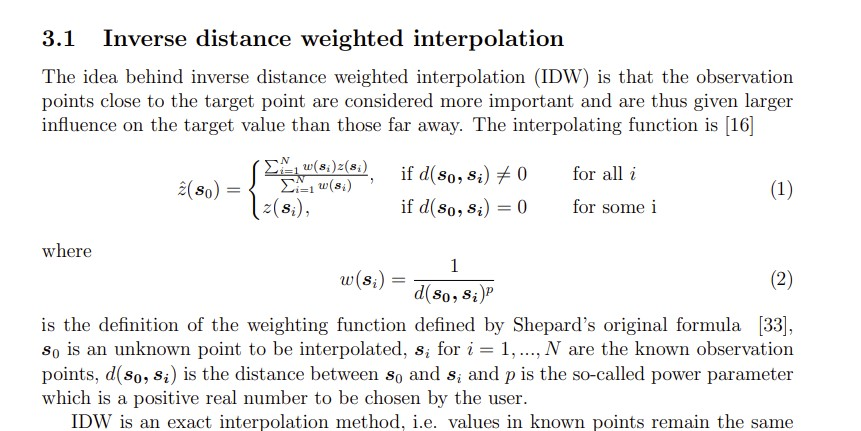trying IDW


In [77]:
# function to find the weights for each
def find_distsance(ind):
    #min_val= 100000000
    #list_nearest=[]
    index_track=0
    dist_list=[]
    for j in TX_weather_stations.index:
        dist = haversine((fire1['Latitude'][ind], fire1['Longitude'][ind]),
                (TX_weather_stations['lat'][j],TX_weather_stations['lon'][j]),unit='mi' )
        dist_list.append(dist)
    return dist_list
        

In [78]:
def weights_IDW(dist_list):
    weight_list=[]
    for i in dist_list:
        weight_list.append(1/(i*i))
    return weight_list

In [79]:
weather_merged_temp['hour']=''
weather_merged_temp['min']=''

<ipython-input-79-769f8f7da7bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_merged_temp['hour']=''
<ipython-input-79-769f8f7da7bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_merged_temp['min']=''


In [80]:
weather_merged_temp

,station,tmpf,lat,lon,Dates,Time,hour,min
0,GUL,77.0,27.3039,-93.5383,2022-01-01,2022-10-19 00:00:00,,
1,GUL,77.0,27.3039,-93.5383,2022-01-01,2022-10-19 00:20:00,,
2,GUL,77.0,27.3039,-93.5383,2022-01-01,2022-10-19 00:40:00,,
3,GUL,77.0,27.3039,-93.5383,2022-01-01,2022-10-19 01:00:00,,
4,GUL,77.0,27.3039,-93.5383,2022-01-01,2022-10-19 01:20:00,,
...,...,...,...,...,...,...,...,...
2838524,ATA,93.7,33.1018,-94.1953,2022-09-22,2022-10-19 22:35:00,,
2838525,ATA,92.5,33.1018,-94.1953,2022-09-22,2022-10-19 22:55:00,,
2838526,ATA,89.8,33.1018,-94.1953,2022-09-22,2022-10-19 23:15:00,,
2838527,ATA,86.0,33.1018,-94.1953,2022-09-22,2022-10-19 23:35:00,,


In [81]:
int(weather_merged_temp['Time'][2838524].minute)

AttributeError: 'str' object has no attribute 'minute'

In [82]:
for row in weather_merged_temp.itertuples():
    weather_merged_temp.at[row.Index,'hour']=int(row[6].hour)
    weather_merged_temp.at[row.Index,'min']=int(row[6].minute)


AttributeError: 'str' object has no attribute 'hour'

In [83]:
weather_merged_temp

,station,tmpf,lat,lon,Dates,Time,hour,min
0,GUL,77.0,27.3039,-93.5383,2022-01-01,2022-10-19 00:00:00,,
1,GUL,77.0,27.3039,-93.5383,2022-01-01,2022-10-19 00:20:00,,
2,GUL,77.0,27.3039,-93.5383,2022-01-01,2022-10-19 00:40:00,,
3,GUL,77.0,27.3039,-93.5383,2022-01-01,2022-10-19 01:00:00,,
4,GUL,77.0,27.3039,-93.5383,2022-01-01,2022-10-19 01:20:00,,
...,...,...,...,...,...,...,...,...
2838524,ATA,93.7,33.1018,-94.1953,2022-09-22,2022-10-19 22:35:00,,
2838525,ATA,92.5,33.1018,-94.1953,2022-09-22,2022-10-19 22:55:00,,
2838526,ATA,89.8,33.1018,-94.1953,2022-09-22,2022-10-19 23:15:00,,
2838527,ATA,86.0,33.1018,-94.1953,2022-09-22,2022-10-19 23:35:00,,


In [84]:
weather_merged_temp['year']=""
weather_merged_temp['month']=""
weather_merged_temp['day']=""

<ipython-input-84-391e62e7dcc1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_merged_temp['year']=""
<ipython-input-84-391e62e7dcc1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_merged_temp['month']=""
<ipython-input-84-391e62e7dcc1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [93]:
weather_merged_temp

,station,tmpf,lat,lon,Dates,Time,hour,min,year,month,day
0,GUL,77.0,27.3039,-93.5383,2022-01-01,2022-10-19 00:00:00,,,2022,1,1
1,GUL,77.0,27.3039,-93.5383,2022-01-01,2022-10-19 00:20:00,,,2022,1,1
2,GUL,77.0,27.3039,-93.5383,2022-01-01,2022-10-19 00:40:00,,,2022,1,1
3,GUL,77.0,27.3039,-93.5383,2022-01-01,2022-10-19 01:00:00,,,2022,1,1
4,GUL,77.0,27.3039,-93.5383,2022-01-01,2022-10-19 01:20:00,,,2022,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2838524,ATA,93.7,33.1018,-94.1953,2022-09-22,2022-10-19 22:35:00,,,2022,9,22
2838525,ATA,92.5,33.1018,-94.1953,2022-09-22,2022-10-19 22:55:00,,,2022,9,22
2838526,ATA,89.8,33.1018,-94.1953,2022-09-22,2022-10-19 23:15:00,,,2022,9,22
2838527,ATA,86.0,33.1018,-94.1953,2022-09-22,2022-10-19 23:35:00,,,2022,9,22


In [94]:
int(weather_merged_temp['Time'][0][0:4])

2022

In [124]:
for row in weather_merged_temp.itertuples():
    weather_merged_temp.at[row.Index,'year']=int(row[5].year)
    weather_merged_temp.at[row.Index,'month']=int(row[5].month)
    weather_merged_temp.at[row.Index,'day']=int(row[5].day)

In [125]:
weather_merged_temp

,station,tmpf,lat,lon,Dates,Time,hour,min,year,month,day
0,GUL,77.0,27.3039,-93.5383,2022-01-01,2022-10-19 00:00:00,,,2022,1,1
1,GUL,77.0,27.3039,-93.5383,2022-01-01,2022-10-19 00:20:00,,,2022,1,1
2,GUL,77.0,27.3039,-93.5383,2022-01-01,2022-10-19 00:40:00,,,2022,1,1
3,GUL,77.0,27.3039,-93.5383,2022-01-01,2022-10-19 01:00:00,,,2022,1,1
4,GUL,77.0,27.3039,-93.5383,2022-01-01,2022-10-19 01:20:00,,,2022,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2838524,ATA,93.7,33.1018,-94.1953,2022-09-22,2022-10-19 22:35:00,,,2022,9,22
2838525,ATA,92.5,33.1018,-94.1953,2022-09-22,2022-10-19 22:55:00,,,2022,9,22
2838526,ATA,89.8,33.1018,-94.1953,2022-09-22,2022-10-19 23:15:00,,,2022,9,22
2838527,ATA,86.0,33.1018,-94.1953,2022-09-22,2022-10-19 23:35:00,,,2022,9,22


In [126]:
weather_merged_temp["Time"].max()

'2022-10-19 23:59:00'

In [130]:
int(weather_merged_temp["Time"][0][11:13])

0

In [131]:
for row in weather_merged_temp.itertuples():
    weather_merged_temp.at[row.Index,'hour']=int(row[6][11:13])
    weather_merged_temp.at[row.Index,'min']=int(row[6][14:16])

In [132]:
fire1

,Longitude,Latitude,ObservedDate,State,AirTempStandPlace,Dates,Time,Year,weather_station_id,weather_station_name,temp_fire,month,day,hour,minute
94,-99.18639,30.73583,2022/03/15 13:28:59+00,TX,48 deg. F,2022-03-15,13:28:59,2022,AQO,LLANO_MUNI_ARPT,48,3,15,13,28
105,-101.56833,35.69028,2022/09/17 13:36:00+00,TX,74 deg. F,2022-09-17,13:36:00,2022,BGD,BORGER/HUTCHINSON,74,9,17,13,36
145,-94.11639,32.65833,2022/03/15 13:11:00+00,TX,53 deg. F,2022-03-15,13:11:00,2022,ASL,Marshall,53,3,15,13,11
163,-101.15778,30.98556,2022/03/24 06:08:00+00,TX,41 deg. F,2022-03-24,06:08:00,2022,OZA,Ozona,41,3,24,6,8
175,-98.52500,31.04944,2022/04/25 16:07:00+00,TX,64 deg. F,2022-04-25,16:07:00,2022,81R,San Saba,64,4,25,16,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288,-97.63206,33.28267,2022/09/17 14:03:00+00,TX,78 deg. F,2022-09-17,14:03:00,2022,LUD,DECATUR,78,9,17,14,3
4291,-96.99306,32.60917,2022/09/17 14:08:00+00,TX,79 deg. F,2022-09-17,14:08:00,2022,GPM,GRAND_PRAIRIE,79,9,17,14,8
4293,-95.09472,30.51806,2022/09/17 14:03:00+00,TX,78 deg. F,2022-09-17,14:03:00,2022,6R3,Cleveland,78,9,17,14,3
4299,-97.81694,32.44694,2022/09/17 14:03:59+00,TX,79 deg. F,2022-09-17,14:03:59,2022,GDJ,GRANBURY,79,9,17,14,3


In [133]:
fire1["month"]=""
fire1["day"]=""
fire1["hour"]=""
fire1["minute"]=""

In [134]:
for row in fire1.itertuples():
    fire1.at[row.Index,'month']=int(row[6].month)
    fire1.at[row.Index,'day']=int(row[6].day)
    fire1.at[row.Index,'hour']=int(row[7].hour)
    fire1.at[row.Index,'minute']=int(row[7].minute)

In [135]:
TX_weather_stations

,station,station_name,lat,lon,elev,begints,iem_network
0,ABI,Abilene,32.41063,-99.68209,544.9975,8/1/1946 0:00,TX_ASOS
1,GYF,Alaminos Canyon Block 857,26.12900,-94.89800,65.0000,12/27/2019 0:00,TX_ASOS
2,ALI,ALICE INTL AIRPORT,27.74089,-98.02694,54.0000,8/1/1946 0:00,TX_ASOS
3,E38,ALPINE,30.38400,-103.68400,1376.0000,6/6/2003 0:00,TX_ASOS
4,AMA,AMARILLO ARPT(AWOS),35.21936,-101.70592,1099.0000,3/1/1943 0:00,TX_ASOS
...,...,...,...,...,...,...,...
227,ARM,WHARTON REGIONAL ARPT,29.25428,-96.15439,30.0000,1/1/2005 0:00,TX_ASOS
228,SPS,WICHITA FALLS/SHEP,33.97860,-98.49280,314.0000,4/13/1942 0:00,TX_ASOS
229,INK,WINK/WINKLER CO.,31.78000,-103.20000,859.0000,8/1/1946 0:00,TX_ASOS
230,APY,Zapata,26.96879,-99.24891,128.6000,11/26/2008 0:00,TX_ASOS


In [136]:
merged_df['tmpf'].max()

129.9

In [137]:
fire1['temp_fire'].max()

95

In [138]:
weights_final=[]
for i in fire1.index:
    d = find_distsance(i)
    w = weights_IDW(d)
    weights_final.append(w)

##### OPTIMIZED FOR SPEED
##### USE OF DISCTIONARY

In [146]:
d_weather_stations={}
for i in TX_weather_stations.index:
    d_weather_stations[TX_weather_stations['station'][i]] = weather_merged_temp[weather_merged_temp['station']==
                                                                                TX_weather_stations['station'][i]]
    

In [147]:
weather_merged_temp

,station,tmpf,lat,lon,Dates,Time,hour,min,year,month,day
0,GUL,77.0,27.3039,-93.5383,2022-01-01,2022-10-19 00:00:00,0,0,2022,1,1
1,GUL,77.0,27.3039,-93.5383,2022-01-01,2022-10-19 00:20:00,0,20,2022,1,1
2,GUL,77.0,27.3039,-93.5383,2022-01-01,2022-10-19 00:40:00,0,40,2022,1,1
3,GUL,77.0,27.3039,-93.5383,2022-01-01,2022-10-19 01:00:00,1,0,2022,1,1
4,GUL,77.0,27.3039,-93.5383,2022-01-01,2022-10-19 01:20:00,1,20,2022,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2838524,ATA,93.7,33.1018,-94.1953,2022-09-22,2022-10-19 22:35:00,22,35,2022,9,22
2838525,ATA,92.5,33.1018,-94.1953,2022-09-22,2022-10-19 22:55:00,22,55,2022,9,22
2838526,ATA,89.8,33.1018,-94.1953,2022-09-22,2022-10-19 23:15:00,23,15,2022,9,22
2838527,ATA,86.0,33.1018,-94.1953,2022-09-22,2022-10-19 23:35:00,23,35,2022,9,22


In [148]:
fire1

,Longitude,Latitude,ObservedDate,State,AirTempStandPlace,Dates,Time,Year,weather_station_id,weather_station_name,temp_fire,month,day,hour,minute
94,-99.18639,30.73583,2022/03/15 13:28:59+00,TX,48 deg. F,2022-03-15,13:28:59,2022,AQO,LLANO_MUNI_ARPT,48,3,15,13,28
105,-101.56833,35.69028,2022/09/17 13:36:00+00,TX,74 deg. F,2022-09-17,13:36:00,2022,BGD,BORGER/HUTCHINSON,74,9,17,13,36
145,-94.11639,32.65833,2022/03/15 13:11:00+00,TX,53 deg. F,2022-03-15,13:11:00,2022,ASL,Marshall,53,3,15,13,11
163,-101.15778,30.98556,2022/03/24 06:08:00+00,TX,41 deg. F,2022-03-24,06:08:00,2022,OZA,Ozona,41,3,24,6,8
175,-98.52500,31.04944,2022/04/25 16:07:00+00,TX,64 deg. F,2022-04-25,16:07:00,2022,81R,San Saba,64,4,25,16,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288,-97.63206,33.28267,2022/09/17 14:03:00+00,TX,78 deg. F,2022-09-17,14:03:00,2022,LUD,DECATUR,78,9,17,14,3
4291,-96.99306,32.60917,2022/09/17 14:08:00+00,TX,79 deg. F,2022-09-17,14:08:00,2022,GPM,GRAND_PRAIRIE,79,9,17,14,8
4293,-95.09472,30.51806,2022/09/17 14:03:00+00,TX,78 deg. F,2022-09-17,14:03:00,2022,6R3,Cleveland,78,9,17,14,3
4299,-97.81694,32.44694,2022/09/17 14:03:59+00,TX,79 deg. F,2022-09-17,14:03:59,2022,GDJ,GRANBURY,79,9,17,14,3


In [149]:
import time

In [164]:
T=[]
for i in fire1.index:
    print(i)
    start_time = time.time()

    t=[]
    for j in d_weather_stations.keys():
        
        a=d_weather_stations[j][(d_weather_stations[j]['year']==fire1['Year'][i])&
                              (d_weather_stations[j]['month']==fire1['month'][i]) &
                             (d_weather_stations[j]['day']==fire1['day'][i]) &
                             (d_weather_stations[j]['hour']==fire1['hour'][i]) &
                             (d_weather_stations[j]['min']>=fire1['minute'][i])]['tmpf']
    
        if len(a)>=1:
            a=np.mean(a)
        else:
            a=-1000

        t.append(a)
    print("--- %s seconds ---" % (time.time() - start_time))
    T.append(t)

94
--- 0.8857934474945068 seconds ---
105
--- 0.8761622905731201 seconds ---
145
--- 0.8935818672180176 seconds ---
163
--- 0.9498634338378906 seconds ---
175
--- 0.918311357498169 seconds ---
268
--- 0.8957953453063965 seconds ---
282
--- 0.9138224124908447 seconds ---
299
--- 0.9191534519195557 seconds ---
318
--- 0.8969948291778564 seconds ---
394
--- 0.9087011814117432 seconds ---
424
--- 0.8980574607849121 seconds ---
458
--- 0.9074366092681885 seconds ---
495
--- 0.9196581840515137 seconds ---
500
--- 0.9091229438781738 seconds ---
575
--- 0.9541664123535156 seconds ---
665
--- 0.9226162433624268 seconds ---
678
--- 0.9179940223693848 seconds ---
740
--- 0.9260189533233643 seconds ---
743
--- 0.9269449710845947 seconds ---
759
--- 0.9318969249725342 seconds ---
809
--- 0.9349517822265625 seconds ---
822
--- 1.0331072807312012 seconds ---
833
--- 1.0104689598083496 seconds ---
855
--- 0.9860501289367676 seconds ---
904
--- 1.006582498550415 seconds ---
949
--- 0.9803178310394287 s

In [165]:
#####################################################

In [166]:
T

[[46.9,
  77.6,
  61.0,
  40.1,
  35.1,
  37.150000000000006,
  60.1,
  51.1,
  46.4,
  -1000,
  57.2,
  -1000,
  57.9,
  55.9,
  57.25,
  58.8,
  59.0,
  55.7,
  42.05,
  35.8,
  47.400000000000006,
  -1000,
  33.1,
  44.0,
  48.2,
  54.05,
  -1000,
  62.6,
  48.65,
  55.5,
  47.55,
  69.1,
  -1000,
  55.9,
  55.3,
  nan,
  30.75,
  -1000,
  56.3,
  52.05,
  50.0,
  59.0,
  -1000,
  42.1,
  44.6,
  -1000,
  47.3,
  54.85,
  -1000,
  55.9,
  52.35,
  49.1,
  54.0,
  -1000,
  62.1,
  64.0,
  50.0,
  59.0,
  50.9,
  28.0,
  50.0,
  50.0,
  48.9,
  48.9,
  46.05,
  54.0,
  48.9,
  51.8,
  48.0,
  25.75,
  45.5,
  55.05,
  -1000,
  45.400000000000006,
  58.45,
  39.9,
  61.7,
  34.5,
  55.4,
  46.0,
  48.9,
  48.9,
  55.9,
  51.8,
  55.4,
  46.65,
  -1000,
  63.0,
  52.7,
  55.9,
  56.3,
  56.3,
  51.0,
  54.5,
  47.05,
  49.45,
  50.0,
  46.6,
  48.0,
  68.0,
  52.05,
  64.0,
  52.5,
  59.9,
  52.25,
  -1000,
  26.85,
  -1000,
  50.4,
  55.0,
  71.6,
  53.400000000000006,
  58.1,
  57.0,


In [153]:
fire1_idw = fire1
fire1_idw["temp_interpolated"]=""
fire1_idw

,Longitude,Latitude,ObservedDate,State,AirTempStandPlace,Dates,Time,Year,weather_station_id,weather_station_name,temp_fire,month,day,hour,minute,temp_interpolated
94,-99.18639,30.73583,2022/03/15 13:28:59+00,TX,48 deg. F,2022-03-15,13:28:59,2022,AQO,LLANO_MUNI_ARPT,48,3,15,13,28,
105,-101.56833,35.69028,2022/09/17 13:36:00+00,TX,74 deg. F,2022-09-17,13:36:00,2022,BGD,BORGER/HUTCHINSON,74,9,17,13,36,
145,-94.11639,32.65833,2022/03/15 13:11:00+00,TX,53 deg. F,2022-03-15,13:11:00,2022,ASL,Marshall,53,3,15,13,11,
163,-101.15778,30.98556,2022/03/24 06:08:00+00,TX,41 deg. F,2022-03-24,06:08:00,2022,OZA,Ozona,41,3,24,6,8,
175,-98.52500,31.04944,2022/04/25 16:07:00+00,TX,64 deg. F,2022-04-25,16:07:00,2022,81R,San Saba,64,4,25,16,7,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288,-97.63206,33.28267,2022/09/17 14:03:00+00,TX,78 deg. F,2022-09-17,14:03:00,2022,LUD,DECATUR,78,9,17,14,3,
4291,-96.99306,32.60917,2022/09/17 14:08:00+00,TX,79 deg. F,2022-09-17,14:08:00,2022,GPM,GRAND_PRAIRIE,79,9,17,14,8,
4293,-95.09472,30.51806,2022/09/17 14:03:00+00,TX,78 deg. F,2022-09-17,14:03:00,2022,6R3,Cleveland,78,9,17,14,3,
4299,-97.81694,32.44694,2022/09/17 14:03:59+00,TX,79 deg. F,2022-09-17,14:03:59,2022,GDJ,GRANBURY,79,9,17,14,3,


In [154]:
for i in range(len(T)):
    for j in range(len(T[i])):
        if np.isnan(T[i][j])==True:
            T[i][j]=0
        

In [155]:
final_temp=[]
for i in range(len(T)):
    s=sum(x * y for x, y in zip(T[i], weights_final[i]))
    w_sum=np.sum(weights_final[i])
    print(s)
    print(weights_final)
    final_temp.append(s/w_sum)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[7.021534819065035e-05, 5.912565252109961e-06, 2.0962316070694926e-05, 1.3853148855784957e-05, 8.527635270390252e-06, 1.9645704408390578e-05, 1.6033589540774302e-05, 3.0424720852985388e-05, 2.044748455014278e-05, 8.899914777601014e-06, 0.0001010071611095469, 0.00010465512259851258, 0.00010465567005324708, 0.00012461709445150902, 1.8357778775332034e-05, 1.1128039452571704e-05, 1.02469174293172e-05, 2.946685848928015e-05, 5.163445877812978e-05, 3.407694419532163e-05, 1.4197856527707397e-05, 7.664919640870493e-06, 7.466045566743743e-06, 2.173267564711516e-05, 0.0009947956874695146, 3.4777314649408006e-05, 1.302779933266525e-05, 1.4873913415433401e-05, 5.24169184932301e-05, 3.411076886460674e-05, 2.8780434122750293e-05, 8.16636955304513e-06, 0.00018096796803403732, 0.00031564351620784654, 4.542795194460535e-05, 5.753585520755259e-05, 7.575649933140082e-06, 4.022992900360359e-05, 3.030603812073307e-05, 1.0768401874960434e-05, 0.00010332160760897757, 0.00010332445008112832, 1.06467220509295

In [156]:
len(final_temp)

124

In [157]:
final_temp=[]
for i in range(len(T)):
    s=sum(x * y for x, y in zip(T[i], weights_final[i]))
    w_sum=np.sum(weights_final[i])
    print(s)
    print(weights_final)
    final_temp.append(s/w_sum)

In [158]:
fire1_idw

,Longitude,Latitude,ObservedDate,State,AirTempStandPlace,Dates,Time,Year,weather_station_id,weather_station_name,temp_fire,month,day,hour,minute,temp_interpolated
94,-99.18639,30.73583,2022/03/15 13:28:59+00,TX,48 deg. F,2022-03-15,13:28:59,2022,AQO,LLANO_MUNI_ARPT,48,3,15,13,28,46.795650
105,-101.56833,35.69028,2022/09/17 13:36:00+00,TX,74 deg. F,2022-09-17,13:36:00,2022,BGD,BORGER/HUTCHINSON,74,9,17,13,36,73.846670
145,-94.11639,32.65833,2022/03/15 13:11:00+00,TX,53 deg. F,2022-03-15,13:11:00,2022,ASL,Marshall,53,3,15,13,11,43.605693
163,-101.15778,30.98556,2022/03/24 06:08:00+00,TX,41 deg. F,2022-03-24,06:08:00,2022,OZA,Ozona,41,3,24,6,8,40.017728
175,-98.52500,31.04944,2022/04/25 16:07:00+00,TX,64 deg. F,2022-04-25,16:07:00,2022,81R,San Saba,64,4,25,16,7,59.044265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288,-97.63206,33.28267,2022/09/17 14:03:00+00,TX,78 deg. F,2022-09-17,14:03:00,2022,LUD,DECATUR,78,9,17,14,3,77.896531
4291,-96.99306,32.60917,2022/09/17 14:08:00+00,TX,79 deg. F,2022-09-17,14:08:00,2022,GPM,GRAND_PRAIRIE,79,9,17,14,8,79.487333
4293,-95.09472,30.51806,2022/09/17 14:03:00+00,TX,78 deg. F,2022-09-17,14:03:00,2022,6R3,Cleveland,78,9,17,14,3,49.721932
4299,-97.81694,32.44694,2022/09/17 14:03:59+00,TX,79 deg. F,2022-09-17,14:03:59,2022,GDJ,GRANBURY,79,9,17,14,3,79.165250


In [159]:
a=sum((x-y)**2 for x, y in zip(fire1_idw['temp_fire'], fire1_idw["temp_interpolated"]))
print("MSE {} ".format(a/len(fire1_idw)))

MSE 352.1497361325184 


In [424]:
a

43666.56728043228

In [430]:
np.max(fire1_idw["temp_fire"]-fire1_idw["temp_interpolated"])

73.89273852844389

<AxesSubplot: >

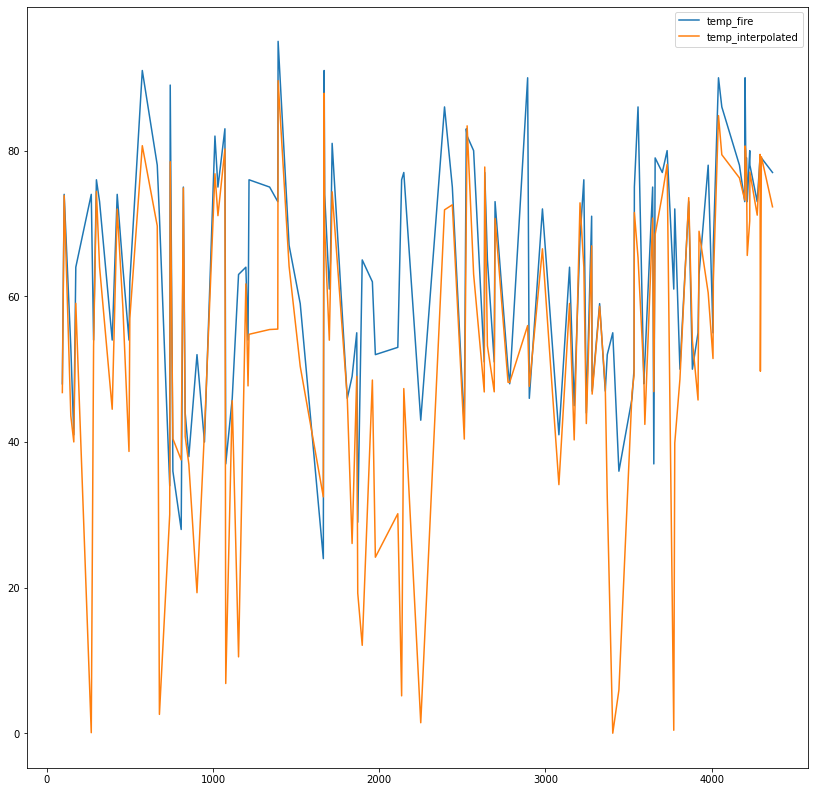

In [443]:
fire1_idw.plot(y=["temp_fire","temp_interpolated"],figsize =(14,14))

In [172]:
#################################################
#Generalize the process 
# T -  Temperature recorded at each station at each date
#weights_final - i^2
#temp_final
fire1_idw_m2= fire1
fire1_idw_m2["temp_interpolated_sq"]=""
fire1_idw_m2

#################################################

,Longitude,Latitude,ObservedDate,State,AirTempStandPlace,Dates,Time,Year,weather_station_id,weather_station_name,temp_fire,month,day,hour,minute,temp_interpolated,temp_interpolated_sq
94,-99.18639,30.73583,2022/03/15 13:28:59+00,TX,48 deg. F,2022-03-15,13:28:59,2022,AQO,LLANO_MUNI_ARPT,48,3,15,13,28,46.795650,
105,-101.56833,35.69028,2022/09/17 13:36:00+00,TX,74 deg. F,2022-09-17,13:36:00,2022,BGD,BORGER/HUTCHINSON,74,9,17,13,36,73.846670,
145,-94.11639,32.65833,2022/03/15 13:11:00+00,TX,53 deg. F,2022-03-15,13:11:00,2022,ASL,Marshall,53,3,15,13,11,43.605693,
163,-101.15778,30.98556,2022/03/24 06:08:00+00,TX,41 deg. F,2022-03-24,06:08:00,2022,OZA,Ozona,41,3,24,6,8,40.017728,
175,-98.52500,31.04944,2022/04/25 16:07:00+00,TX,64 deg. F,2022-04-25,16:07:00,2022,81R,San Saba,64,4,25,16,7,59.044265,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288,-97.63206,33.28267,2022/09/17 14:03:00+00,TX,78 deg. F,2022-09-17,14:03:00,2022,LUD,DECATUR,78,9,17,14,3,77.896531,
4291,-96.99306,32.60917,2022/09/17 14:08:00+00,TX,79 deg. F,2022-09-17,14:08:00,2022,GPM,GRAND_PRAIRIE,79,9,17,14,8,79.487333,
4293,-95.09472,30.51806,2022/09/17 14:03:00+00,TX,78 deg. F,2022-09-17,14:03:00,2022,6R3,Cleveland,78,9,17,14,3,49.721932,
4299,-97.81694,32.44694,2022/09/17 14:03:59+00,TX,79 deg. F,2022-09-17,14:03:59,2022,GDJ,GRANBURY,79,9,17,14,3,79.165250,


In [178]:
for i in range(len(T)):
    for j in range(len(T[i])):
        if np.isnan(T[i][j])==True:
            T[i][j]=-1000
        

In [179]:
for i in range(len(T)):
    for j in range(len(T[i])):
        if T[i][j]==-1000:
            weights_final[i][j]=0

In [180]:
final_temp=[]
for i in range(len(T)):    
    s=sum(x * y for x, y in zip(T[i], weights_final[i]))
    w_sum=np.sum(weights_final[i])
    print(s)
    print(weights_final)
    final_temp.append(s/w_sum)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [181]:
final_temp

[51.449270225295884,
 74.6264347765077,
 51.79989988746524,
 42.164329829066716,
 64.6504574273512,
 79.1113188825657,
 55.78036454678018,
 78.83924740109636,
 76.2748882630034,
 52.83231071989417,
 78.93346506080302,
 65.70448351992805,
 57.38810972843192,
 77.93262696026628,
 90.46962260206308,
 81.26244631214296,
 72.50986104661531,
 34.67689356157495,
 87.94709936895859,
 42.81542948883958,
 39.281472373352806,
 74.89957695239983,
 46.48230987585322,
 40.17060466116307,
 51.88390599099837,
 46.06914254584381,
 80.94824306718202,
 75.00432617858888,
 80.23567846521084,
 39.839509932681665,
 48.188520636568875,
 72.45123274875975,
 63.79816962687966,
 50.68296065027959,
 79.0957044422458,
 74.29350972846007,
 73.59743765947226,
 90.98113294700761,
 67.32650810848557,
 58.680620161469534,
 34.99143431481832,
 80.20939269225443,
 89.33722130391736,
 78.32403339794399,
 65.40225088189307,
 64.58828171303645,
 79.07974404984449,
 48.26245785325147,
 52.09752650586948,
 54.478765195128354

In [182]:
fire1_idw_m2["temp_interpolated_sq"]=final_temp
fire1_idw_m2

,Longitude,Latitude,ObservedDate,State,AirTempStandPlace,Dates,Time,Year,weather_station_id,weather_station_name,temp_fire,month,day,hour,minute,temp_interpolated,temp_interpolated_sq
94,-99.18639,30.73583,2022/03/15 13:28:59+00,TX,48 deg. F,2022-03-15,13:28:59,2022,AQO,LLANO_MUNI_ARPT,48,3,15,13,28,46.795650,51.449270
105,-101.56833,35.69028,2022/09/17 13:36:00+00,TX,74 deg. F,2022-09-17,13:36:00,2022,BGD,BORGER/HUTCHINSON,74,9,17,13,36,73.846670,74.626435
145,-94.11639,32.65833,2022/03/15 13:11:00+00,TX,53 deg. F,2022-03-15,13:11:00,2022,ASL,Marshall,53,3,15,13,11,43.605693,51.799900
163,-101.15778,30.98556,2022/03/24 06:08:00+00,TX,41 deg. F,2022-03-24,06:08:00,2022,OZA,Ozona,41,3,24,6,8,40.017728,42.164330
175,-98.52500,31.04944,2022/04/25 16:07:00+00,TX,64 deg. F,2022-04-25,16:07:00,2022,81R,San Saba,64,4,25,16,7,59.044265,64.650457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288,-97.63206,33.28267,2022/09/17 14:03:00+00,TX,78 deg. F,2022-09-17,14:03:00,2022,LUD,DECATUR,78,9,17,14,3,77.896531,78.742783
4291,-96.99306,32.60917,2022/09/17 14:08:00+00,TX,79 deg. F,2022-09-17,14:08:00,2022,GPM,GRAND_PRAIRIE,79,9,17,14,8,79.487333,80.194155
4293,-95.09472,30.51806,2022/09/17 14:03:00+00,TX,78 deg. F,2022-09-17,14:03:00,2022,6R3,Cleveland,78,9,17,14,3,49.721932,81.897470
4299,-97.81694,32.44694,2022/09/17 14:03:59+00,TX,79 deg. F,2022-09-17,14:03:59,2022,GDJ,GRANBURY,79,9,17,14,3,79.165250,79.167215


In [183]:
a=sum((x-y)**2 for x, y in zip(fire1_idw_m2['temp_fire'], fire1_idw_m2["temp_interpolated_sq"]))
print("MSE {} ".format(a/len(fire1_idw_m2)))

MSE 17.511011476987104 


In [163]:
##################################
##############################
#################################

In [448]:
# different p
def weights_IDW_p2(dist_list):
    weight_list=[]
    for i in dist_list:
        weight_list.append(1/(i**3))
    return weight_list

In [449]:
weights_final_p2=[]
for i in fire1.index:
    d = find_distsance(i)
    w = weights_IDW_p2(d)
    weights_final_p2.append(w)

In [450]:
fire1_idw["temp_interpolated_p2"]=""
final_temp_p2=[]
for i in range(len(T)):
    s=sum(x * y for x, y in zip(T[i], weights_final_p2[i]))
    w_sum=np.sum(weights_final_p2[i])
    final_temp_p2.append(s/w_sum)
fire1_idw["temp_interpolated_p2"]=final_temp_p2

In [452]:
a=sum((x-y)**2 for x, y in zip(fire1_idw['temp_fire'], fire1_idw["temp_interpolated_p2"]))
print("MSE p=3-{} ".format(a/len(fire1_idw)))

MSE p=3-479.54467432757707 


In [455]:
fire1_idw

,Longitude,Latitude,ObservedDate,State,AirTempStandPlace,Dates,Time,Year,weather_station_id,weather_station_name,temp_fire,month,day,hour,minute,temp_interpolated,temp_interpolated_p2
94,-99.18639,30.73583,2022/03/15 13:28:59+00,TX,48 deg. F,2022-03-15,13:28:59,2022,AQO,LLANO_MUNI_ARPT,48,3,15,13,28,46.795650,47.800166
105,-101.56833,35.69028,2022/09/17 13:36:00+00,TX,74 deg. F,2022-09-17,13:36:00,2022,BGD,BORGER/HUTCHINSON,74,9,17,13,36,73.846670,75.353010
145,-94.11639,32.65833,2022/03/15 13:11:00+00,TX,53 deg. F,2022-03-15,13:11:00,2022,ASL,Marshall,53,3,15,13,11,43.605693,46.626610
163,-101.15778,30.98556,2022/03/24 06:08:00+00,TX,41 deg. F,2022-03-24,06:08:00,2022,OZA,Ozona,41,3,24,6,8,40.017728,40.746676
175,-98.52500,31.04944,2022/04/25 16:07:00+00,TX,64 deg. F,2022-04-25,16:07:00,2022,81R,San Saba,64,4,25,16,7,59.044265,61.422509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288,-97.63206,33.28267,2022/09/17 14:03:00+00,TX,78 deg. F,2022-09-17,14:03:00,2022,LUD,DECATUR,78,9,17,14,3,77.896531,78.307202
4291,-96.99306,32.60917,2022/09/17 14:08:00+00,TX,79 deg. F,2022-09-17,14:08:00,2022,GPM,GRAND_PRAIRIE,79,9,17,14,8,79.487333,80.261066
4293,-95.09472,30.51806,2022/09/17 14:03:00+00,TX,78 deg. F,2022-09-17,14:03:00,2022,6R3,Cleveland,78,9,17,14,3,49.721932,24.658945
4299,-97.81694,32.44694,2022/09/17 14:03:59+00,TX,79 deg. F,2022-09-17,14:03:59,2022,GDJ,GRANBURY,79,9,17,14,3,79.165250,79.166666


In [457]:
## Getting large eroro because its taking the 0 values rows and weights too.
# need to create a seperate list of weights to use each time ie.e discard those weights at which indecx the temperatur found=0
dict_temp_weights={}
for i in fire1.index:
    dict_temp_weights[i]=(T[0])

Int64Index([  94,  105,  145,  163,  175,  268,  282,  299,  318,  394,
            ...
            4210, 4214, 4229, 4230, 4274, 4288, 4291, 4293, 4299, 4366],
           dtype='int64', length=124)